In [1]:
#File description & paths to csv's
"""
File imports csv files (pls change the path to your files below) and makes couple dataframes:

*** credit_records_o ***contains credit_records from csv file, same structure as in the file
*** application_records_o *** contains data from application csv, file same structure as in the file
*** credit_records_p is ***same as credit_records_0 but in alternative structure (rows = ID, columns= MONTH_BALANCE, values=STATUs for a given ID and month)
*** app_and_credit *** is app_records inner joined with credit records_p 
*** credit_records_p_without_na *** credit records wihtouth NAs values (ie. situation where there is no credit history)
*** credit_records_p_without_na_and_X *** credit records without NAs and X (i.e. situation where is no credit history or there was a month without a loan)
*** app_and_credit2 *** is app_records with credit records labelling (i.e. if smn was late, if someone defaulted etc.)
*** app_and_credit3 *** is app records with credit records but no NAs or X (no loan for a month)


and one function:
*** feature_target(feature,target) *** this function compares feature (i.e. gender) to target (i.e. current month credit status)
"""

path_to_credit_records_csv='C:\\Users\\User\\OneDrive\\Desktop\\Kurs\\Projekt\\Python\\Dane\\credit_record.csv' #replace with your path to credit records.csv
path_to_application_records_csv='C:\\Users\\User\\OneDrive\\Desktop\\Kurs\\Projekt\\Python\\Dane\\application_record.csv' #replace with your path to credit records.csv

In [2]:
#Import of data & dataframe def & fun def
import csv
import pandas as pd
file=open(path_to_credit_records_csv) #open file with credit records
credit_records_o=pd.read_csv(file) #import data from file to credit_records data frame
file.close()

file=open(path_to_application_records_csv) #open file application records
application_records_o=pd.read_csv(file) #import application records directly to a dataframe named application_records
file.close()

#alternate structure of credit data from columns=ID,MONTH_BALANCE,STATUS and values in rows to rows = ID of client, columns= MONTH_BALANCE, values=STATUS for a given ID and month
credit_records_p=pd.pivot(credit_records_o, index='ID',columns='MONTHS_BALANCE',values='STATUS') 
credit_records_p = credit_records_p[credit_records_p.columns.sort_values(ascending=False)] #reorder month balance from 0 to -60

#merge app data with credit data by ID (inner join)
app_and_credit=application_records_o.merge(credit_records_p,on='ID') 

#This function takes applications features (ID + Gender, Eduction etc) to compare with target
def feature_target(data,feature,target):
    """
    Use this function to compare feature (i.e. gender, education etc.) vs target (i.e. current month credit status)
    
    feature_target('CODE_GENDER',0) Will show:
    
    	          0	           1	       2	       3	       4	       5	       C	       X
    CODE_GENDER								
            F	0.283981	0.008960	0.000549	0.000183	0.000061	0.002194	0.524320	0.179751
            M	0.269417	0.010767	0.001210	0.000363	0.000484	0.002782	0.528914	0.186063

    Which should be read as there are 7 buckets (1,2,3,4,5,C,X) of possible credit status in current month (month 0)
    There are two possible buckets in CODE_GENDER (F - female and M-male).
    All men and women where assigned to relevant bucket (i.e. F0 - women who paid with less than month delay, F1, women who paid with less than 2 month delay)
    Then all buckets are represented as percentage of feature population (in this case female and male population) 
    F0 = 0.28 means 0.28 of all women paid their credit wiht less than month delay,F1=0.008 means 0.008 of all women paid their credit with less then 2 months delay and so on)
    By comparing values in columns you can see if feature (i.e. gender in this case) influences target (i.e. wheter you pay on time C or with delay 0,1,2,3,4,5)
    """
    compare_o=data[['ID',feature,target]].groupby([feature,target],as_index=False).count() #create a dataframe that shows counts of ID per Gender (feature) in columns and 0 month status (target) in rows
    compare_o
    compare_h=pd.pivot(compare_o,index=feature,columns=target,values='ID') #this repivots the data from vertical to horizontal to show count of IDs per Gender in rows and 0 month status (target) in columns
    compare_h
    sum_h=compare_h.sum(axis=1) #sum of columns
    return compare_h.apply(lambda compare_h: round(compare_h / sum_h,2)) #show percentage of values vs total per row (i.e. what perentage of women pay on time C = 52% and men similar)


In [3]:
#Explore Data in Application file / frame
#Observations marked with ####

####There is 438 557 rows, all non null only occupation_type column has blanks for 130k
# display(application_records_o.info())


for el in application_records_o.columns:
    print(f'Unique values count for column {el} is:')
    display(application_records_o[el].value_counts(ascending=False))

# # # #ID: There is roughly 47 ID duplicates and rest is unique
# # # #Gender: There is roughly 2times more women (294k) than man (144k)
# # # #Own_car: There is roughly 1.5time more owners (275k) than non owners(163k)
# # # #Own_realty: There is roughly 2 times more owners (304k) than non owners(134k)
# # # #Count_children there is person with 19, 1 with 14, 4 with 12 kids. Most though have 0-2
# # # #Income there is 800 different incomes
# # # #Income type mostly working 226k, comm ass 100k, 75k pensioner and 17 students( need to remove those)
# # # #Education type - mostly secondary 301k, higher 120k, Academic 312
# # # #Family Status - moslty marries 299k, 52k single etc.
# # # #Housing type - mostly houst/apartm 393k 
# # # #Days Birth - 16 500 different values (Sure there will be outliers)
# # # #Days emplooyes - there is 75k people who have value 365243 - what is that? rest seems to be spraed in strange manner
# # # #Flag mobil - all records have 1 so not useful
# # # #Flag work phone - most 0 (384k) 90k private
# # # # Flag email - similar 391k no 47k yes
# # # #Occupation Type - dispersed laboresr 80k, IT staff 604
# # # #family members - 1 with 20, most thoguh have 2 233k 

Unique values count for column ID is:


7137299    2
7702238    2
7282535    2
7243768    2
7050948    2
          ..
5690727    1
6621262    1
6621261    1
6621260    1
6842885    1
Name: ID, Length: 438510, dtype: int64

Unique values count for column CODE_GENDER is:


F    294440
M    144117
Name: CODE_GENDER, dtype: int64

Unique values count for column FLAG_OWN_CAR is:


N    275459
Y    163098
Name: FLAG_OWN_CAR, dtype: int64

Unique values count for column FLAG_OWN_REALTY is:


Y    304074
N    134483
Name: FLAG_OWN_REALTY, dtype: int64

Unique values count for column CNT_CHILDREN is:


0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64

Unique values count for column AMT_INCOME_TOTAL is:


135000.0    46879
157500.0    39768
180000.0    37912
112500.0    36979
225000.0    34130
            ...  
151425.0        1
133461.0        1
265950.0        1
201150.0        1
36679.5         1
Name: AMT_INCOME_TOTAL, Length: 866, dtype: int64

Unique values count for column NAME_INCOME_TYPE is:


Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64

Unique values count for column NAME_EDUCATION_TYPE is:


Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64

Unique values count for column NAME_FAMILY_STATUS is:


Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: NAME_FAMILY_STATUS, dtype: int64

Unique values count for column NAME_HOUSING_TYPE is:


House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAME_HOUSING_TYPE, dtype: int64

Unique values count for column DAYS_BIRTH is:


-11707    150
-14178    121
-14400    116
-13482    112
-13274    112
         ... 
-8207       1
-8286       1
-12793      1
-24592      1
-8590       1
Name: DAYS_BIRTH, Length: 16379, dtype: int64

Unique values count for column DAYS_EMPLOYED is:


 365243    75329
-218         262
-1678        251
-249         241
-978         240
           ...  
-13529         1
-10223         1
-8917          1
-11429         1
-8105          1
Name: DAYS_EMPLOYED, Length: 9406, dtype: int64

Unique values count for column FLAG_MOBIL is:


1    438557
Name: FLAG_MOBIL, dtype: int64

Unique values count for column FLAG_WORK_PHONE is:


0    348156
1     90401
Name: FLAG_WORK_PHONE, dtype: int64

Unique values count for column FLAG_PHONE is:


0    312353
1    126204
Name: FLAG_PHONE, dtype: int64

Unique values count for column FLAG_EMAIL is:


0    391102
1     47455
Name: FLAG_EMAIL, dtype: int64

Unique values count for column OCCUPATION_TYPE is:


Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: OCCUPATION_TYPE, dtype: int64

Unique values count for column CNT_FAM_MEMBERS is:


2.0     233891
1.0      84492
3.0      77128
4.0      37356
5.0       5081
6.0        459
7.0        124
9.0          9
11.0         5
14.0         4
8.0          4
15.0         3
20.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

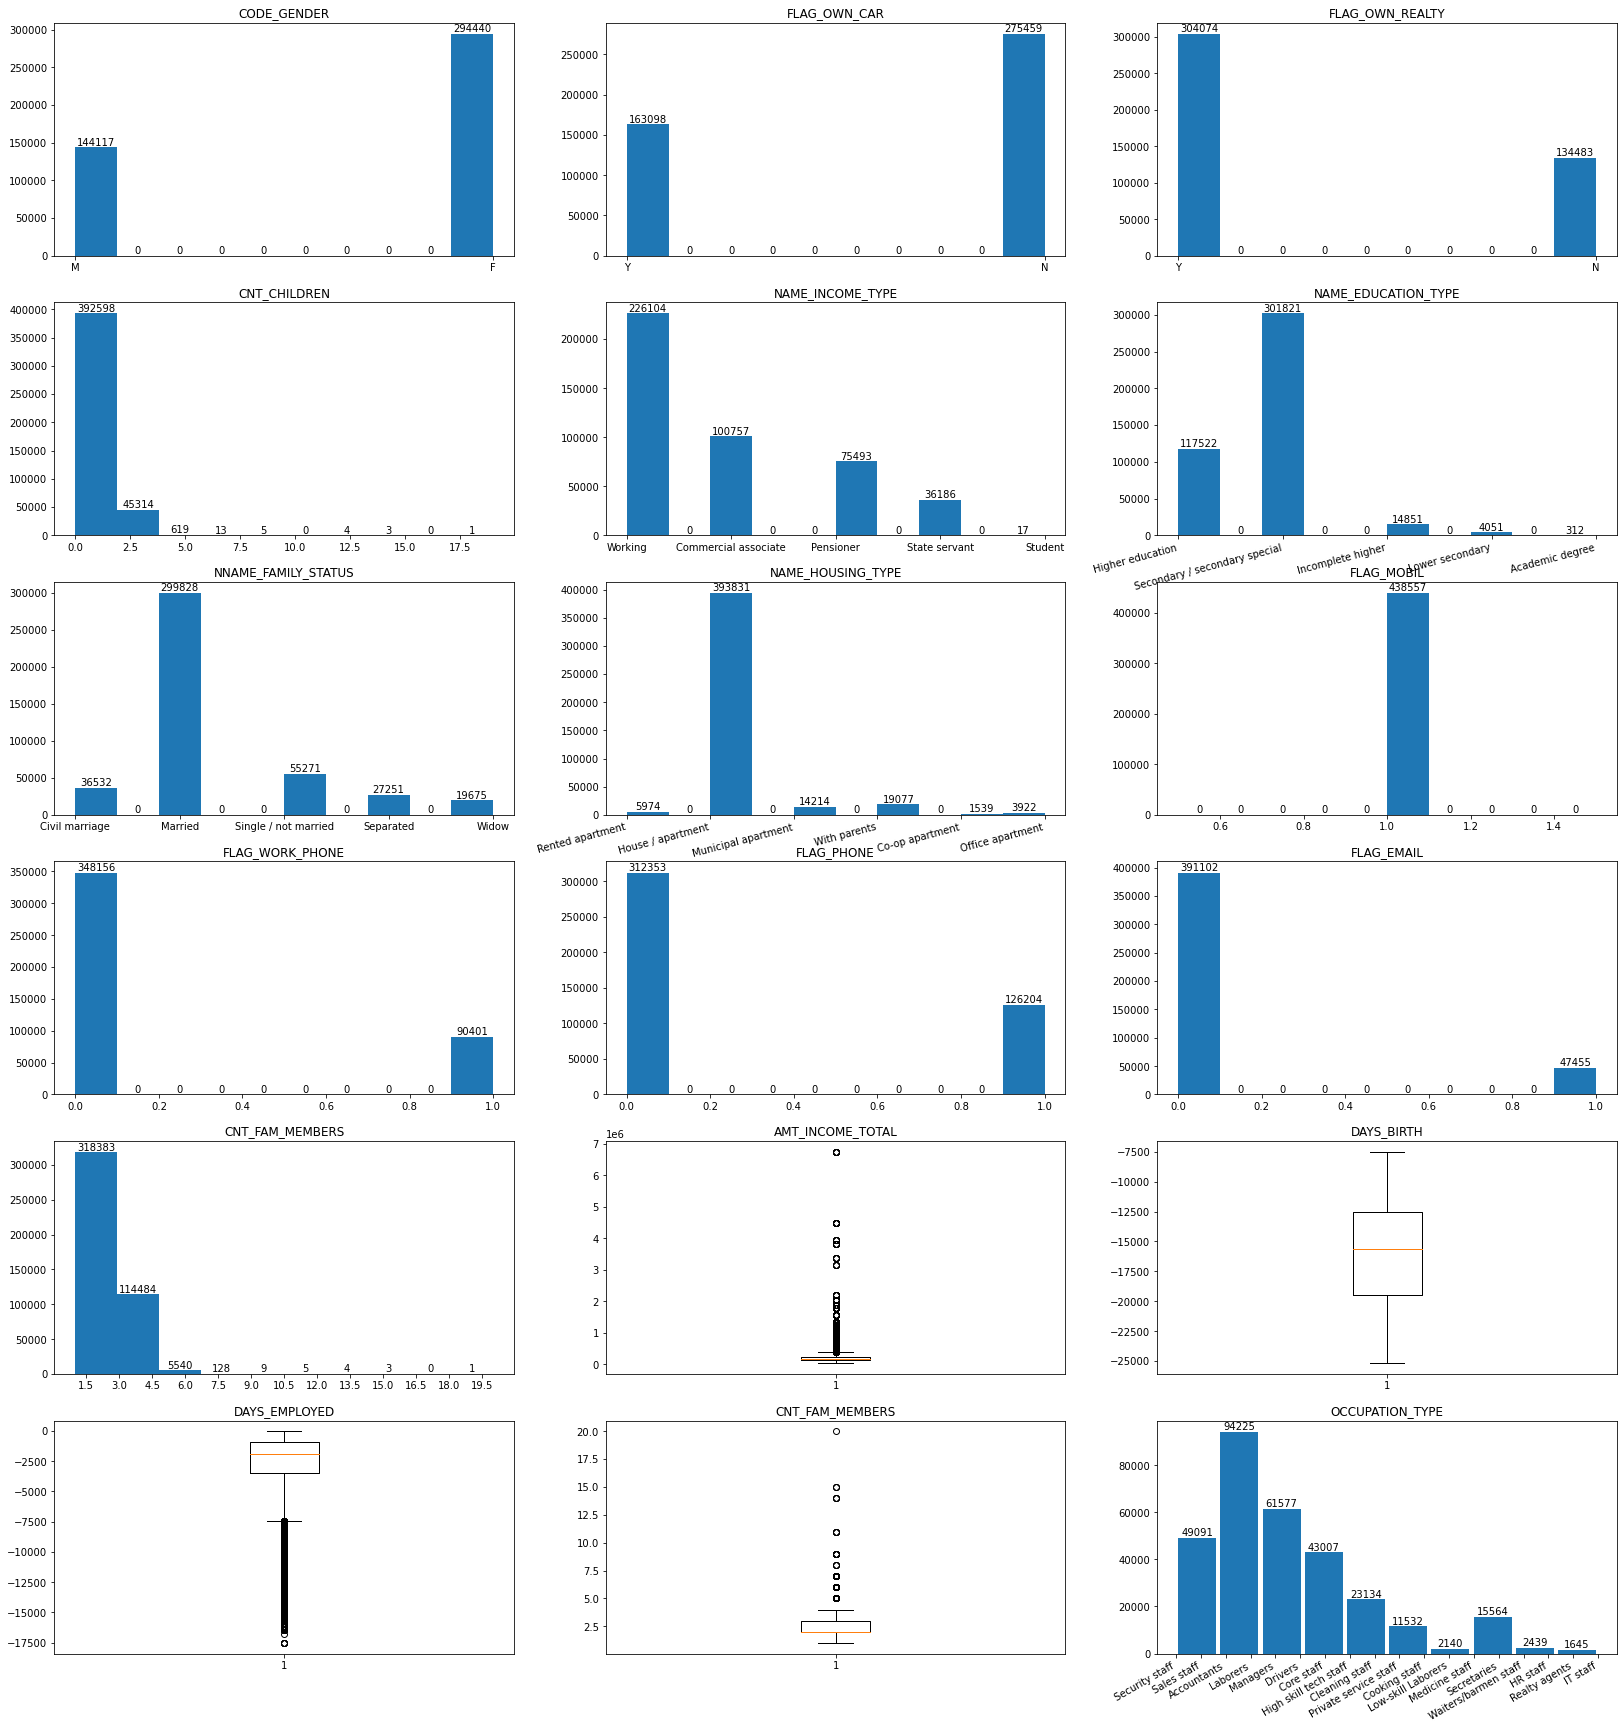

In [4]:
#Explore Data in Application file visually => same conclusions as exploring via data but wasn't able to draw histogram for Occupation somehow every two categeries get shown together? 
# Aslo employed days has 70k of value 365243 which is infinity so it was replaced with None
import matplotlib.pyplot as plt

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(6, 3,figsize=(28,30))

axis[0, 0].hist(application_records_o[['CODE_GENDER']])
axis[0, 0].set_title("CODE_GENDER")
axis[0,0].bar_label(axis[0,0].containers[0])
  
axis[0, 1].hist(application_records_o[['FLAG_OWN_CAR']])
axis[0, 1].set_title("FLAG_OWN_CAR")
axis[0,1].bar_label(axis[0,1].containers[0])
  
axis[0, 2].hist(application_records_o[['FLAG_OWN_REALTY']])
axis[0, 2].set_title("FLAG_OWN_REALTY")
axis[0,2].bar_label(axis[0,2].containers[0])
  
axis[1, 0].hist(application_records_o[['CNT_CHILDREN']])
axis[1 ,0].xaxis.set_major_locator(plt.MaxNLocator(9))
axis[1, 0].set_title("CNT_CHILDREN")
axis[1,0].bar_label(axis[1,0].containers[0])

axis[1, 1].hist(application_records_o[['NAME_INCOME_TYPE']])
axis[1, 1].set_title("NAME_INCOME_TYPE")
axis[1,1].bar_label(axis[1,1].containers[0])

axis[1, 2].hist(application_records_o[['NAME_EDUCATION_TYPE']])
axis[1, 2].set_title("NAME_EDUCATION_TYPE")
plt.setp(axis[1,2].get_xticklabels(), rotation=15, horizontalalignment='right')
axis[1,2].bar_label(axis[1,2].containers[0])

axis[2, 0].hist(application_records_o[['NAME_FAMILY_STATUS']])
axis[2, 0].set_title("NNAME_FAMILY_STATUS")
axis[2,0].bar_label(axis[2,0].containers[0])

axis[2, 1].hist(application_records_o[['NAME_HOUSING_TYPE']])
axis[2, 1].set_title("NAME_HOUSING_TYPE")
plt.setp(axis[2,1].get_xticklabels(), rotation=15, horizontalalignment='right')
axis[2,1].bar_label(axis[2,1].containers[0])

axis[2, 2].hist(application_records_o[['FLAG_MOBIL']])
axis[2, 2].set_title("FLAG_MOBIL")
axis[2, 2].bar_label(axis[2,2].containers[0])

axis[3, 0].hist(application_records_o[['FLAG_WORK_PHONE']])
axis[3, 0].set_title("FLAG_WORK_PHONE")
axis[3,0].bar_label(axis[3,0].containers[0])

axis[3, 1].hist(application_records_o[['FLAG_PHONE']])
axis[3, 1].set_title("FLAG_PHONE")
axis[3, 1].bar_label(axis[3,1].containers[0])

axis[3, 2].hist(application_records_o[['FLAG_EMAIL']])
axis[3, 2].set_title("FLAG_EMAIL")
axis[3, 2].bar_label(axis[3,2].containers[0])

axis[4, 0].hist(application_records_o[['CNT_FAM_MEMBERS']])
axis[4, 0].set_title("CNT_FAM_MEMBERS")
axis[4 ,0].xaxis.set_major_locator(plt.MaxNLocator(20)) #This should increase the ticks density to 20
axis[4 ,0].bar_label(axis[4,0].containers[0])

# # For Sine Function
axis[4, 1].boxplot(application_records_o[['AMT_INCOME_TOTAL']])
axis[4, 1].set_title("AMT_INCOME_TOTAL")
  
# # For Cosine Function
axis[4, 2].boxplot(application_records_o[['DAYS_BIRTH']])
axis[4, 2].set_title("DAYS_BIRTH")
  
# # For Tangent Function
application_records_o['DAYS_EMPLOYED'] = application_records_o['DAYS_EMPLOYED'].replace([365243],None)
axis[5, 0].boxplot(application_records_o[['DAYS_EMPLOYED']].dropna())
axis[5, 0].set_title("DAYS_EMPLOYED")
 
# # For Tanh Function
axis[5, 1].boxplot(application_records_o[['CNT_FAM_MEMBERS']])
axis[5, 1].set_title("CNT_FAM_MEMBERS")

axis[5, 2].hist(application_records_o[['OCCUPATION_TYPE']].dropna(),rwidth=0.9) #Had to remove NaN otherwise was getting errors from matplotlib
axis[5, 2].set_title("OCCUPATION_TYPE")
axis[5,2].bar_label(axis[5,2].containers[0])
plt.setp(axis[5,2].get_xticklabels(), rotation=30, horizontalalignment='right') #need to rotate xaxis tick labels so they don't overlap

# # Combine all the operations and display
plt.show()

In [5]:
#Data Cleansing
application_records_c=application_records_o.copy()

#There are 47 duplicates of IDs (with different underlying data) and none of them are in credit records (below makes set of duplicated ID from app records and intersects them with credit records id)
#len(set(application_records_o[application_records_o.duplicated('ID',keep='last')]['ID']).intersection(set(credit_records_p.index)))
application_records_c.drop_duplicates(['ID'],inplace=True)

#There is 75k records where DAYS_EMPLOYED equals 365243 which means smn is forseen to eb employed for long time. 6200 of those match those in credit records, see code below:
#len(set(application_records_c[application_records_c['DAYS_EMPLOYED']==365243]['ID']).intersection(set(credit_records_p.index)))
application_records_c['DAYS_EMPLOYED'].value_counts(ascending=False)

application_records_c.pivot_table(index=['OCCUPATION_TYPE'],dropna=False)

#application_records_c[application_records_c['OCCUPATION_TYPE'].isnull()]

# import numpy as np
# application_records_c[application_records_c['OCCUPATION_TYPE'].isna().any(axis=0)]

# for el in application_records_c.columns:
#     print(f'{el} there is {application_records_c[el].isnull().sum()} nan elements')

# for el in application_records_c.columns:
#     print(el, len(application_records_c[el])-len(application_records_c.drop_duplicates(el)))


# t=len(application_records_c.drop_duplicates())-len(application_records_c.drop_duplicates)

# for el in application_records_c.columns:
#     print(f'There is {application_records_c[application_records_c.duplicated(el)].sum()} duplicates in {el}')

# len(set(application_records_o[application_records_o.duplicated('ID',keep='last')]['ID']).intersection(set(credit_records_p.index)))



,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_EMAIL,FLAG_MOBIL,FLAG_PHONE,FLAG_WORK_PHONE,ID
OCCUPATION_TYPE,,,,,,,,,,
Accountants,215138.856316,0.495777,2.262967,-14903.690609,-2556.807671,0.191766,1.0,0.338360,0.243947,6.024421e+06
Cleaning staff,147041.638028,0.353243,2.069827,-17475.520965,-2316.454390,0.069656,1.0,0.253979,0.209995,5.986437e+06
Cooking staff,155848.425334,0.476721,2.247400,-15318.980064,-2320.346335,0.078257,1.0,0.243066,0.228331,6.019916e+06
Core staff,190910.759283,0.554465,2.337023,-14195.479977,-2991.751023,0.131116,1.0,0.307163,0.271488,6.017438e+06
Drivers,202065.242047,0.555424,2.407512,-14948.618704,-2098.667344,0.090571,1.0,0.277616,0.235416,6.020831e+06
HR staff,203620.686047,0.325581,2.020672,-14464.348837,-2425.567183,0.161499,1.0,0.272610,0.223514,6.030162e+06
High skill tech staff,195710.440171,0.473706,2.244258,-15058.084640,-3086.168470,0.136997,1.0,0.305178,0.246572,6.027655e+06
IT staff,210958.733444,0.322848,1.973510,-13572.278146,-2340.668874,0.240066,1.0,0.289735,0.152318,6.024466e+06
Laborers,179869.648982,0.528103,2.322212,-14705.682504,-2744.396556,0.092866,1.0,0.260702,0.235341,6.033329e+06


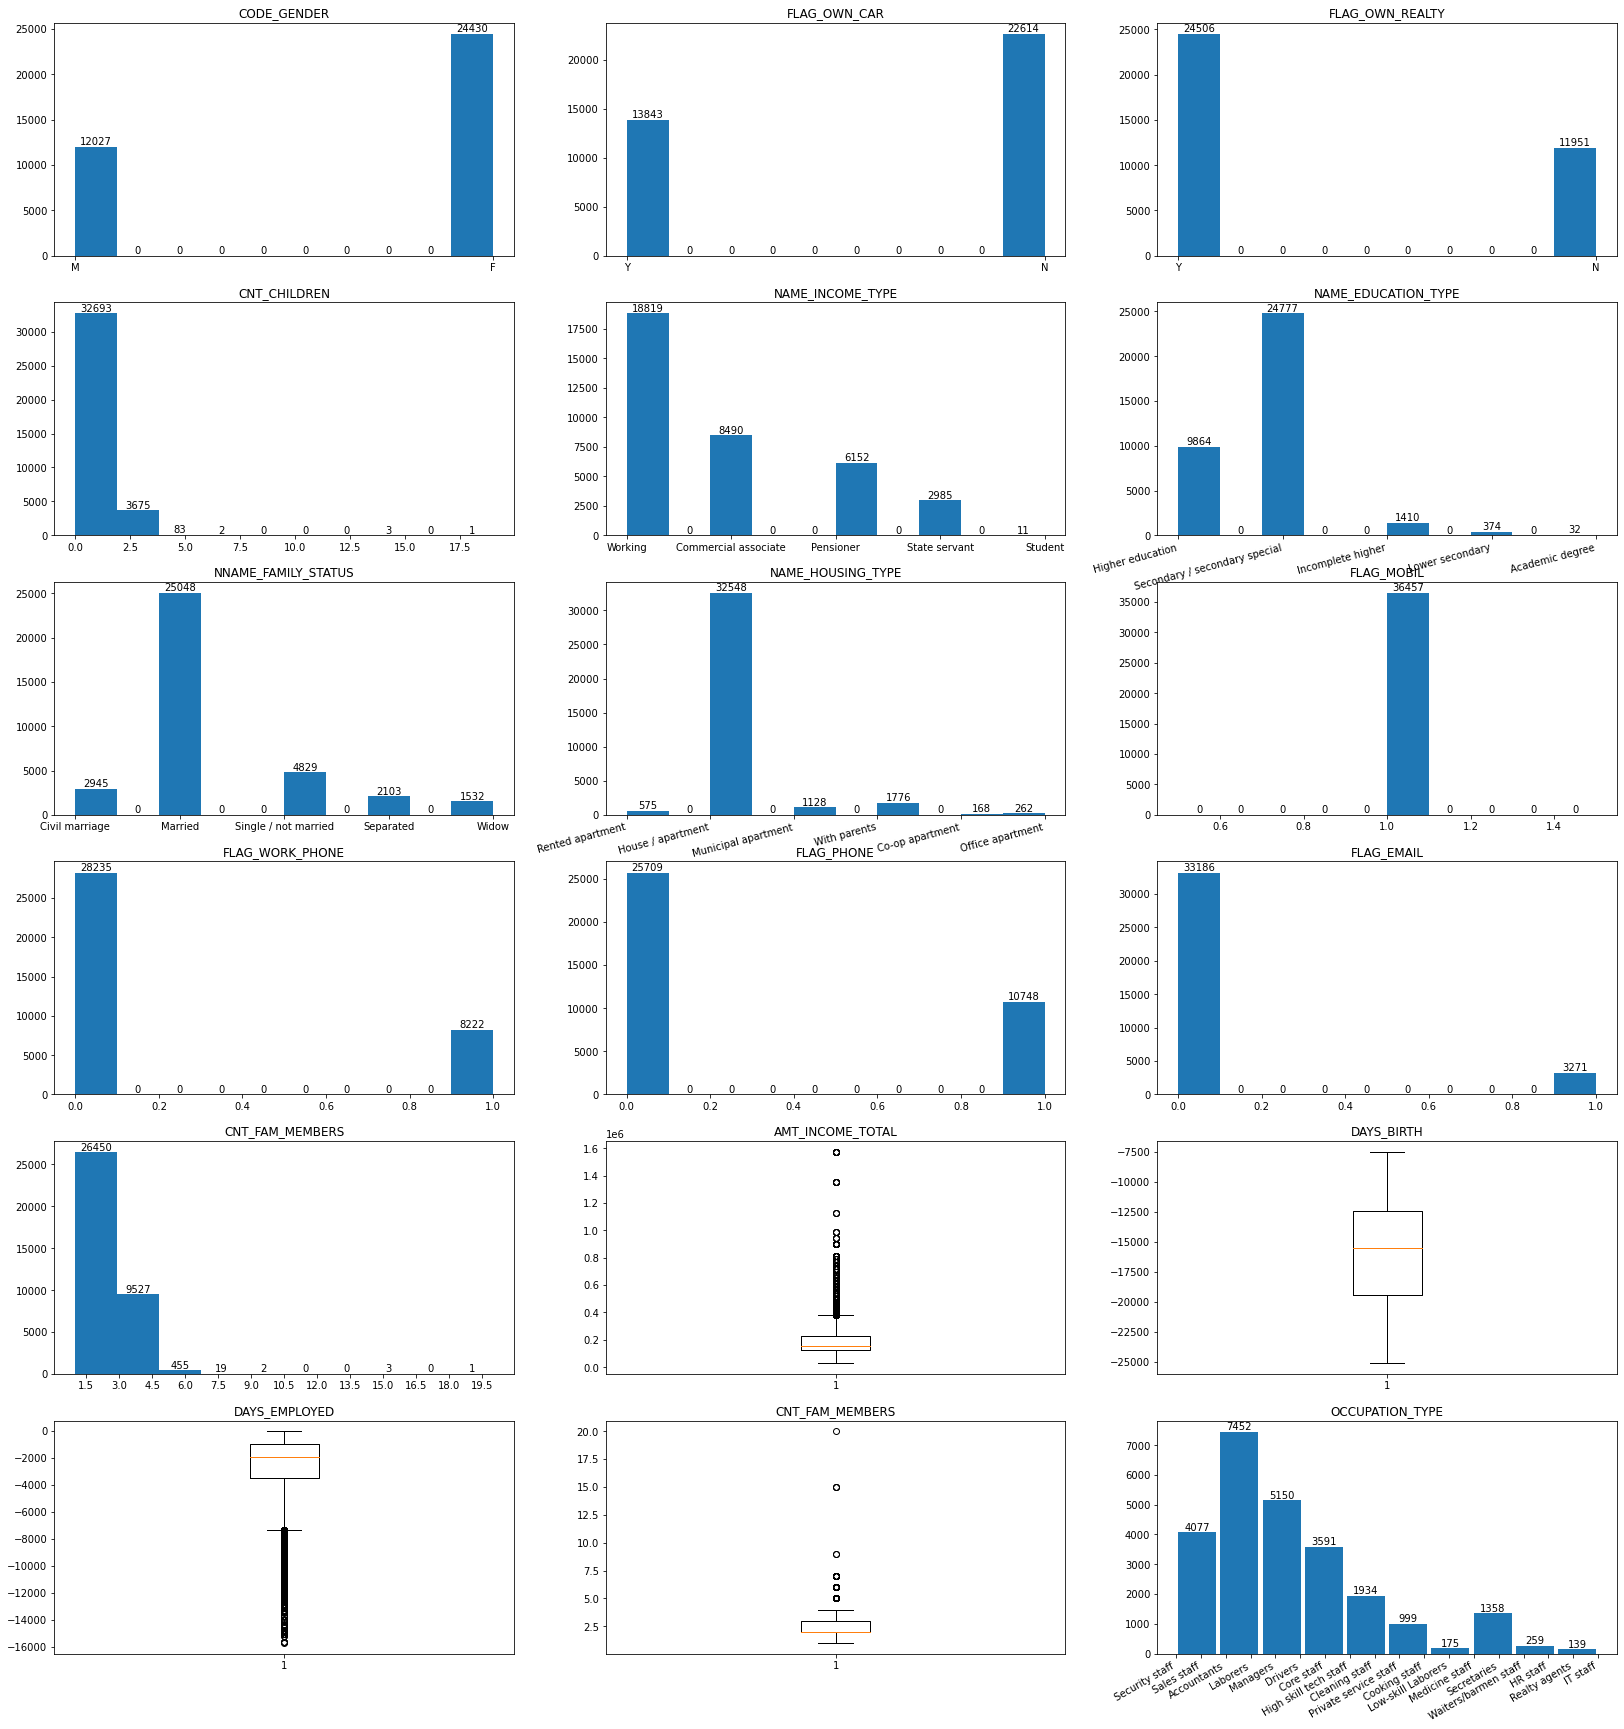

In [6]:
#Explore Visually Application & Credit data merged (there is rouglhly 46k records vs 460k records in app data) file visually
#IT does not seem to be different then for app data only in a glance
import matplotlib.pyplot as plt

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(6, 3,figsize=(28,30))

axis[0, 0].hist(app_and_credit[['CODE_GENDER']])
axis[0, 0].set_title("CODE_GENDER")
axis[0,0].bar_label(axis[0,0].containers[0])
  
axis[0, 1].hist(app_and_credit[['FLAG_OWN_CAR']])
axis[0, 1].set_title("FLAG_OWN_CAR")
axis[0,1].bar_label(axis[0,1].containers[0])
  
axis[0, 2].hist(app_and_credit[['FLAG_OWN_REALTY']])
axis[0, 2].set_title("FLAG_OWN_REALTY")
axis[0,2].bar_label(axis[0,2].containers[0])
  
axis[1, 0].hist(app_and_credit[['CNT_CHILDREN']])
axis[1 ,0].xaxis.set_major_locator(plt.MaxNLocator(9))
axis[1, 0].set_title("CNT_CHILDREN")
axis[1,0].bar_label(axis[1,0].containers[0])

axis[1, 1].hist(app_and_credit[['NAME_INCOME_TYPE']])
axis[1, 1].set_title("NAME_INCOME_TYPE")
axis[1,1].bar_label(axis[1,1].containers[0])

axis[1, 2].hist(app_and_credit[['NAME_EDUCATION_TYPE']])
axis[1, 2].set_title("NAME_EDUCATION_TYPE")
plt.setp(axis[1,2].get_xticklabels(), rotation=15, horizontalalignment='right')
axis[1,2].bar_label(axis[1,2].containers[0])

axis[2, 0].hist(app_and_credit[['NAME_FAMILY_STATUS']])
axis[2, 0].set_title("NNAME_FAMILY_STATUS")
axis[2,0].bar_label(axis[2,0].containers[0])

axis[2, 1].hist(app_and_credit[['NAME_HOUSING_TYPE']])
axis[2, 1].set_title("NAME_HOUSING_TYPE")
plt.setp(axis[2,1].get_xticklabels(), rotation=15, horizontalalignment='right')
axis[2,1].bar_label(axis[2,1].containers[0])

axis[2, 2].hist(app_and_credit[['FLAG_MOBIL']])
axis[2, 2].set_title("FLAG_MOBIL")
axis[2, 2].bar_label(axis[2,2].containers[0])

axis[3, 0].hist(app_and_credit[['FLAG_WORK_PHONE']])
axis[3, 0].set_title("FLAG_WORK_PHONE")
axis[3,0].bar_label(axis[3,0].containers[0])

axis[3, 1].hist(app_and_credit[['FLAG_PHONE']])
axis[3, 1].set_title("FLAG_PHONE")
axis[3, 1].bar_label(axis[3,1].containers[0])

axis[3, 2].hist(app_and_credit[['FLAG_EMAIL']])
axis[3, 2].set_title("FLAG_EMAIL")
axis[3, 2].bar_label(axis[3,2].containers[0])

axis[4, 0].hist(app_and_credit[['CNT_FAM_MEMBERS']])
axis[4, 0].set_title("CNT_FAM_MEMBERS")
axis[4 ,0].xaxis.set_major_locator(plt.MaxNLocator(20)) #This should increase the ticks density to 20
axis[4 ,0].bar_label(axis[4,0].containers[0])

axis[4, 1].boxplot(app_and_credit[['AMT_INCOME_TOTAL']])
axis[4, 1].set_title("AMT_INCOME_TOTAL")
  
axis[4, 2].boxplot(app_and_credit[['DAYS_BIRTH']])
axis[4, 2].set_title("DAYS_BIRTH")
  
app_and_credit['DAYS_EMPLOYED'] = app_and_credit['DAYS_EMPLOYED'].replace([365243],None)
axis[5, 0].boxplot(app_and_credit[['DAYS_EMPLOYED']].dropna())
axis[5, 0].set_title("DAYS_EMPLOYED")
 
axis[5, 1].boxplot(app_and_credit[['CNT_FAM_MEMBERS']])
axis[5, 1].set_title("CNT_FAM_MEMBERS")

axis[5, 2].hist(app_and_credit[['OCCUPATION_TYPE']].dropna(),rwidth=0.9) #Had to remove NaN otherwise was getting errors from matplotlib
axis[5, 2].set_title("OCCUPATION_TYPE")
axis[5,2].bar_label(axis[5,2].containers[0])
plt.setp(axis[5,2].get_xticklabels(), rotation=30, horizontalalignment='right') #need to rotate xaxis tick labels so they don't overlap

# # Combine all the operations and display
plt.show()

In [7]:
#Investigate outliers for 3 values that show outliers on charts 
#Use IQR method that is take quantile25 and quantile75, calc IQR and then then upper & lower bounds (Q1 -1.5IQR and Q3 + 1.5IQR)

# Check count & % of outliers for AMT_INCOME_TOTAL
q1=app_and_credit['DAYS_EMPLOYED'].quantile(0.25)
q3=app_and_credit['DAYS_EMPLOYED'].quantile(0.75)
iqr = q3-q1

upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
outliers_no=app_and_credit[app_and_credit['DAYS_EMPLOYED']<lower_bound]['DAYS_EMPLOYED'].count()
outliers_perc=outliers_no/app_and_credit['DAYS_EMPLOYED'].count()
display(f'DAYS_EMPLOYED iqr: {iqr}, upper_bound: {upper_bound}, lower_bound {lower_bound}, number of outliers: {outliers_no}, perc of outliers {outliers_perc}')

# Check count & % of outliers for AMT_INCOME_TOTAL
q1=app_and_credit['AMT_INCOME_TOTAL'].quantile(0.25)
q3=app_and_credit['AMT_INCOME_TOTAL'].quantile(0.75)
iqr = q3-q1

upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
outliers_no=app_and_credit[app_and_credit['AMT_INCOME_TOTAL']>upper_bound]['AMT_INCOME_TOTAL'].count()
outliers_perc=outliers_no/app_and_credit['AMT_INCOME_TOTAL'].count()
display(f'AMT_INCOME_TOTAL iqr: {iqr}, upper_bound: {upper_bound}, lower_bound {lower_bound}, number of outliers: {outliers_no}, perc of outliers {outliers_perc}')

# Check count & % of outliers for CNT_FAM_MEMBERs
q1=app_and_credit['CNT_FAM_MEMBERS'].quantile(0.25)
q3=app_and_credit['CNT_FAM_MEMBERS'].quantile(0.75)
iqr = q3-q1

upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
outliers_no=app_and_credit[app_and_credit['CNT_FAM_MEMBERS']>upper_bound]['CNT_FAM_MEMBERS'].count()
outliers_perc=outliers_no/app_and_credit['CNT_FAM_MEMBERS'].count()
display(f'CNT_FAM_MEMBERS iqr: {iqr}, upper_bound: {upper_bound}, lower_bound {lower_bound}, number of outliers: {outliers_no}, perc of outliers {outliers_perc}')


'DAYS_EMPLOYED iqr: 2574.0, upper_bound: 2930.0, lower_bound -7366.0, number of outliers: 1986, perc of outliers 0.05447513509065474'

'AMT_INCOME_TOTAL iqr: 103500.0, upper_bound: 380250.0, lower_bound -33750.0, number of outliers: 1529, perc of outliers 0.04193981951339935'

'CNT_FAM_MEMBERS iqr: 1.0, upper_bound: 4.5, lower_bound 0.5, number of outliers: 480, perc of outliers 0.013166195792303262'

In [8]:
# Label Credit (take 12 month and call count of late) 
#This has serious limitations i.e. Nan are part of it, it catches all in window of 12 last months so not great

from collections import Counter
# p=credit_records_p.fillna('Z').copy() 
p=credit_records_p.copy() 
p=p.iloc[: , :12].copy() #creata a copy of credit records with first twelve column (full year)
p['val_count']=p.apply(lambda x: Counter(x),axis=1) #create a column that count number of each value occurences across columns 
p['Late']=p['val_count'].apply(lambda x: x.get('0',0)+x.get('1',0)+x.get('2',0)+x.get('3',0)+x.get('4',0)+x.get('5',0)) #create a column that counts late occurences
p['Late_yes_no']=p['val_count'].apply(lambda x: x['0']>0 or x['1']>0 or x['2'] or x['3']>0 or x['4']>0 or x['5']>0) #column shows if there were any lates
p['Bad_Late_yes_no']=p['val_count'].apply(lambda x: x['3']>0 or x['4']>0 or x['5']>0) #column shows if there were any bad lates
p['default']=p['val_count'].apply(lambda x: x['5']>0) #counts defaults
p['X_count']=p['val_count'].apply(lambda x: x['X']) #counts defaults

credit_records_p_without_na=p.copy().dropna()
credit_records_p_without_na_and_X=credit_records_p_without_na=credit_records_p_without_na[credit_records_p_without_na['X_count']==0].copy()

# p_no_na['val_count']['X']>0

app_and_credit2=application_records_o.merge(p,on='ID') 
app_and_credit3=application_records_o.merge(credit_records_p_without_na_and_X,on='ID')
#app_and_credit2

In [9]:
#Label credit based of ratio of late vs all months with credit
p=credit_records_p.copy() #make a copy of credit_records
p['val_count']=p.apply(lambda x: Counter(x),axis=1) #add a column that counts values i.e. how many 0,1,2 etc.
# display(p.head())

#Attach to credit records the start, end & len of credit period
grouped_id=credit_records_o.groupby('ID')
p['start_mth']=grouped_id['MONTHS_BALANCE'].min()
p['end_mth']=grouped_id['MONTHS_BALANCE'].max()
p['duration']=abs(p['start_mth']-p['end_mth'])+1 #we substract start and end but add 1 to compensate that 1st month is with 0 index

p['cr_late_count']=p['val_count'].apply(lambda x: x.get('0',0)+x.get('1',0)+x.get('2',0)+x.get('3',0)+x.get('4',0)+x.get('5',0)) #create a column that counts late occurences
p['cr_late_ratio']=p['cr_late_count']/p['duration'] #add columnn showing late ratio to overall duration

credit_records_label_2=p.copy()

In [10]:
#Explore all feature to Late in tabular format

features=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE','FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE','CNT_FAM_MEMBERS']
target='Late'

for el in features:
    display(feature_target(app_and_credit2,el,target))

Late,0,1,2,3,4,5,6,7,8,9,10,11,12
CODE_GENDER,,,,,,,,,,,,,
F,0.58,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.05
M,0.58,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.06


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
FLAG_OWN_CAR,,,,,,,,,,,,,
N,0.58,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.05
Y,0.59,0.04,0.03,0.04,0.04,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.06


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
FLAG_OWN_REALTY,,,,,,,,,,,,,
N,0.58,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.06
Y,0.59,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.05


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
CNT_CHILDREN,,,,,,,,,,,,,
0,0.58,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.05
1,0.59,0.05,0.04,0.04,0.04,0.04,0.04,0.03,0.02,0.02,0.02,0.02,0.05
2,0.60,0.04,0.03,0.04,0.04,0.03,0.04,0.03,0.02,0.02,0.02,0.02,0.05
3,0.59,0.04,0.05,0.04,0.04,0.04,0.04,0.02,0.03,0.02,0.03,0.02,0.05
4,0.49,0.02,0.03,0.05,0.08,0.08,0.06,0.03,0.03,NaN,NaN,NaN,0.13
5,0.65,0.05,0.15,0.05,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,0.05
7,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.33,0.33,NaN,NaN,0.33
19,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
NAME_INCOME_TYPE,,,,,,,,,,,,,
Commercial associate,0.58,0.04,0.03,0.04,0.04,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.06
Pensioner,0.58,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.05
State servant,0.59,0.05,0.03,0.04,0.04,0.03,0.04,0.03,0.03,0.02,0.02,0.02,0.06
Student,0.73,NaN,NaN,NaN,NaN,NaN,NaN,0.09,0.09,0.09,NaN,NaN,NaN
Working,0.58,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.05


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
NAME_EDUCATION_TYPE,,,,,,,,,,,,,
Academic degree,0.72,NaN,NaN,0.03,NaN,0.12,NaN,0.06,NaN,NaN,0.03,NaN,0.03
Higher education,0.60,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.06
Incomplete higher,0.57,0.05,0.04,0.05,0.05,0.05,0.04,0.03,0.02,0.02,0.02,0.02,0.05
Lower secondary,0.63,0.04,0.04,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.01,0.02,0.05
Secondary / secondary special,0.58,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.06


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
NAME_FAMILY_STATUS,,,,,,,,,,,,,
Civil marriage,0.58,0.05,0.04,0.04,0.05,0.04,0.03,0.03,0.03,0.03,0.02,0.02,0.04
Married,0.59,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.06
Separated,0.57,0.05,0.04,0.03,0.05,0.04,0.05,0.02,0.03,0.02,0.03,0.02,0.06
Single / not married,0.55,0.05,0.04,0.05,0.04,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.05
Widow,0.58,0.04,0.05,0.04,0.04,0.04,0.04,0.03,0.02,0.02,0.02,0.02,0.05


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
NAME_HOUSING_TYPE,,,,,,,,,,,,,
Co-op apartment,0.68,0.05,0.02,0.01,0.02,0.04,0.02,0.02,0.02,0.02,0.02,0.02,0.05
House / apartment,0.59,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.06
Municipal apartment,0.58,0.03,0.03,0.03,0.04,0.04,0.05,0.03,0.03,0.02,0.02,0.02,0.07
Office apartment,0.60,0.02,0.05,0.04,0.05,0.03,0.03,0.03,0.02,0.03,0.03,0.02,0.05
Rented apartment,0.55,0.06,0.03,0.06,0.04,0.05,0.02,0.05,0.03,0.03,0.02,0.02,0.04
With parents,0.55,0.06,0.04,0.04,0.05,0.04,0.04,0.03,0.03,0.02,0.03,0.02,0.04


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
FLAG_MOBIL,,,,,,,,,,,,,
1,0.58,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.05


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
FLAG_WORK_PHONE,,,,,,,,,,,,,
0,0.58,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.06
1,0.58,0.05,0.04,0.04,0.04,0.04,0.04,0.03,0.02,0.03,0.02,0.02,0.05


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
FLAG_PHONE,,,,,,,,,,,,,
0,0.58,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.05
1,0.59,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.02,0.03,0.02,0.02,0.06


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
FLAG_EMAIL,,,,,,,,,,,,,
0,0.59,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.05
1,0.57,0.04,0.04,0.04,0.04,0.04,0.05,0.03,0.03,0.02,0.02,0.02,0.07


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
OCCUPATION_TYPE,,,,,,,,,,,,,
Accountants,0.61,0.04,0.03,0.05,0.04,0.03,0.04,0.03,0.03,0.02,0.02,0.02,0.05
Cleaning staff,0.55,0.04,0.04,0.04,0.04,0.05,0.04,0.04,0.03,0.02,0.03,0.03,0.06
Cooking staff,0.54,0.04,0.04,0.05,0.04,0.05,0.06,0.03,0.01,0.02,0.02,0.02,0.06
Core staff,0.58,0.05,0.03,0.04,0.04,0.04,0.03,0.03,0.03,0.03,0.02,0.02,0.06
Drivers,0.58,0.05,0.04,0.03,0.04,0.03,0.04,0.03,0.03,0.02,0.02,0.02,0.06
HR staff,0.51,0.02,0.04,0.04,0.02,0.05,0.09,0.07,0.02,0.01,0.05,0.02,0.06
High skill tech staff,0.59,0.04,0.03,0.04,0.05,0.03,0.04,0.03,0.01,0.02,0.02,0.02,0.07
IT staff,0.50,0.03,0.12,0.03,0.05,0.02,0.02,0.02,0.03,0.02,0.02,0.05,0.10
Laborers,0.58,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.05


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
CNT_FAM_MEMBERS,,,,,,,,,,,,,
1.0,0.56,0.05,0.04,0.05,0.04,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.05
2.0,0.59,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.05
3.0,0.59,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.02,0.02,0.02,0.02,0.06
4.0,0.60,0.04,0.03,0.04,0.04,0.03,0.04,0.03,0.02,0.02,0.02,0.02,0.05
5.0,0.59,0.04,0.05,0.04,0.05,0.04,0.04,0.02,0.03,0.03,0.02,0.02,0.04
6.0,0.53,0.02,0.03,0.05,0.07,0.07,0.05,0.02,0.03,NaN,NaN,NaN,0.12
7.0,0.63,0.05,0.16,0.05,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,0.05
9.0,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.33,0.33,NaN,NaN,0.33


In [11]:
#Explore visuallly all features to Late
features=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE','FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE','CNT_FAM_MEMBERS']
target='Late'

for el in features:
    display(feature_target(app_and_credit2,el,target).style.background_gradient(cmap ='Blues')\
        .set_properties(**{'font-size': '20px'}))
# y=z

#Random chart not really readible
# x=z.loc['F']
# y=z.loc['M']
# z.plot(x,y)

# Heatmmap style table using just 
# z

# # Displaying dataframe as an heatmap
# # with diverging colourmap as RdYlBu
# plt.imshow(z, cmap ="RdYlBu")
  
# # Displaying a color bar to understand
# # which color represents which range of data
# plt.colorbar()
  
# # Assigning labels of x-axis 
# # according to dataframe
# plt.xticks(range(len(z)), z.columns)
  
# # Assigning labels of y-axis 
# # according to dataframe
# plt.yticks(range(len(z)), z.index)
  
# # Displaying the figure
# plt.show()
# plt.imshow(z, cmap ="RdYlBu")

Late,0,1,2,3,4,5,6,7,8,9,10,11,12
CODE_GENDER,,,,,,,,,,,,,
F,0.580000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.030000,0.030000,0.020000,0.020000,0.020000,0.050000
M,0.580000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.030000,0.030000,0.020000,0.020000,0.020000,0.060000


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
FLAG_OWN_CAR,,,,,,,,,,,,,
N,0.580000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.030000,0.030000,0.020000,0.020000,0.020000,0.050000
Y,0.590000,0.040000,0.030000,0.040000,0.040000,0.040000,0.040000,0.030000,0.030000,0.020000,0.020000,0.020000,0.060000


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
FLAG_OWN_REALTY,,,,,,,,,,,,,
N,0.580000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.030000,0.030000,0.020000,0.020000,0.020000,0.060000
Y,0.590000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.030000,0.030000,0.020000,0.020000,0.020000,0.050000


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
CNT_CHILDREN,,,,,,,,,,,,,
0,0.580000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.030000,0.030000,0.020000,0.020000,0.020000,0.050000
1,0.590000,0.050000,0.040000,0.040000,0.040000,0.040000,0.040000,0.030000,0.020000,0.020000,0.020000,0.020000,0.050000
2,0.600000,0.040000,0.030000,0.040000,0.040000,0.030000,0.040000,0.030000,0.020000,0.020000,0.020000,0.020000,0.050000
3,0.590000,0.040000,0.050000,0.040000,0.040000,0.040000,0.040000,0.020000,0.030000,0.020000,0.030000,0.020000,0.050000
4,0.490000,0.020000,0.030000,0.050000,0.080000,0.080000,0.060000,0.030000,0.030000,nan,nan,nan,0.130000
5,0.650000,0.050000,0.150000,0.050000,nan,nan,nan,nan,0.050000,nan,nan,nan,0.050000
7,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
14,nan,nan,nan,nan,nan,nan,nan,nan,0.330000,0.330000,nan,nan,0.330000
19,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
NAME_INCOME_TYPE,,,,,,,,,,,,,
Commercial associate,0.580000,0.040000,0.030000,0.040000,0.040000,0.040000,0.040000,0.030000,0.030000,0.020000,0.020000,0.020000,0.060000
Pensioner,0.580000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.030000,0.030000,0.020000,0.020000,0.020000,0.050000
State servant,0.590000,0.050000,0.030000,0.040000,0.040000,0.030000,0.040000,0.030000,0.030000,0.020000,0.020000,0.020000,0.060000
Student,0.730000,nan,nan,nan,nan,nan,nan,0.090000,0.090000,0.090000,nan,nan,nan
Working,0.580000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.030000,0.030000,0.020000,0.020000,0.020000,0.050000


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
NAME_EDUCATION_TYPE,,,,,,,,,,,,,
Academic degree,0.720000,nan,nan,0.030000,nan,0.120000,nan,0.060000,nan,nan,0.030000,nan,0.030000
Higher education,0.600000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.030000,0.030000,0.020000,0.020000,0.020000,0.060000
Incomplete higher,0.570000,0.050000,0.040000,0.050000,0.050000,0.050000,0.040000,0.030000,0.020000,0.020000,0.020000,0.020000,0.050000
Lower secondary,0.630000,0.040000,0.040000,0.030000,0.030000,0.030000,0.030000,0.030000,0.020000,0.020000,0.010000,0.020000,0.050000
Secondary / secondary special,0.580000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.030000,0.030000,0.020000,0.020000,0.020000,0.060000


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
NAME_FAMILY_STATUS,,,,,,,,,,,,,
Civil marriage,0.580000,0.050000,0.040000,0.040000,0.050000,0.040000,0.030000,0.030000,0.030000,0.030000,0.020000,0.020000,0.040000
Married,0.590000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.030000,0.030000,0.020000,0.020000,0.020000,0.060000
Separated,0.570000,0.050000,0.040000,0.030000,0.050000,0.040000,0.050000,0.020000,0.030000,0.020000,0.030000,0.020000,0.060000
Single / not married,0.550000,0.050000,0.040000,0.050000,0.040000,0.040000,0.040000,0.030000,0.030000,0.020000,0.020000,0.020000,0.050000
Widow,0.580000,0.040000,0.050000,0.040000,0.040000,0.040000,0.040000,0.030000,0.020000,0.020000,0.020000,0.020000,0.050000


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
NAME_HOUSING_TYPE,,,,,,,,,,,,,
Co-op apartment,0.680000,0.050000,0.020000,0.010000,0.020000,0.040000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.050000
House / apartment,0.590000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.030000,0.030000,0.020000,0.020000,0.020000,0.060000
Municipal apartment,0.580000,0.030000,0.030000,0.030000,0.040000,0.040000,0.050000,0.030000,0.030000,0.020000,0.020000,0.020000,0.070000
Office apartment,0.600000,0.020000,0.050000,0.040000,0.050000,0.030000,0.030000,0.030000,0.020000,0.030000,0.030000,0.020000,0.050000
Rented apartment,0.550000,0.060000,0.030000,0.060000,0.040000,0.050000,0.020000,0.050000,0.030000,0.030000,0.020000,0.020000,0.040000
With parents,0.550000,0.060000,0.040000,0.040000,0.050000,0.040000,0.040000,0.030000,0.030000,0.020000,0.030000,0.020000,0.040000


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
FLAG_MOBIL,,,,,,,,,,,,,
1,0.580000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.030000,0.030000,0.020000,0.020000,0.020000,0.050000


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
FLAG_WORK_PHONE,,,,,,,,,,,,,
0,0.580000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.030000,0.030000,0.020000,0.020000,0.020000,0.060000
1,0.580000,0.050000,0.040000,0.040000,0.040000,0.040000,0.040000,0.030000,0.020000,0.030000,0.020000,0.020000,0.050000


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
FLAG_PHONE,,,,,,,,,,,,,
0,0.580000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.030000,0.030000,0.020000,0.020000,0.020000,0.050000
1,0.590000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.030000,0.020000,0.030000,0.020000,0.020000,0.060000


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
FLAG_EMAIL,,,,,,,,,,,,,
0,0.590000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.030000,0.030000,0.020000,0.020000,0.020000,0.050000
1,0.570000,0.040000,0.040000,0.040000,0.040000,0.040000,0.050000,0.030000,0.030000,0.020000,0.020000,0.020000,0.070000


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
OCCUPATION_TYPE,,,,,,,,,,,,,
Accountants,0.610000,0.040000,0.030000,0.050000,0.040000,0.030000,0.040000,0.030000,0.030000,0.020000,0.020000,0.020000,0.050000
Cleaning staff,0.550000,0.040000,0.040000,0.040000,0.040000,0.050000,0.040000,0.040000,0.030000,0.020000,0.030000,0.030000,0.060000
Cooking staff,0.540000,0.040000,0.040000,0.050000,0.040000,0.050000,0.060000,0.030000,0.010000,0.020000,0.020000,0.020000,0.060000
Core staff,0.580000,0.050000,0.030000,0.040000,0.040000,0.040000,0.030000,0.030000,0.030000,0.030000,0.020000,0.020000,0.060000
Drivers,0.580000,0.050000,0.040000,0.030000,0.040000,0.030000,0.040000,0.030000,0.030000,0.020000,0.020000,0.020000,0.060000
HR staff,0.510000,0.020000,0.040000,0.040000,0.020000,0.050000,0.090000,0.070000,0.020000,0.010000,0.050000,0.020000,0.060000
High skill tech staff,0.590000,0.040000,0.030000,0.040000,0.050000,0.030000,0.040000,0.030000,0.010000,0.020000,0.020000,0.020000,0.070000
IT staff,0.500000,0.030000,0.120000,0.030000,0.050000,0.020000,0.020000,0.020000,0.030000,0.020000,0.020000,0.050000,0.100000
Laborers,0.580000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.030000,0.030000,0.020000,0.020000,0.020000,0.050000


Late,0,1,2,3,4,5,6,7,8,9,10,11,12
CNT_FAM_MEMBERS,,,,,,,,,,,,,
1.0,0.560000,0.050000,0.040000,0.050000,0.040000,0.040000,0.040000,0.030000,0.030000,0.020000,0.020000,0.020000,0.050000
2.0,0.590000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.030000,0.030000,0.020000,0.020000,0.020000,0.050000
3.0,0.590000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.030000,0.020000,0.020000,0.020000,0.020000,0.060000
4.0,0.600000,0.040000,0.030000,0.040000,0.040000,0.030000,0.040000,0.030000,0.020000,0.020000,0.020000,0.020000,0.050000
5.0,0.590000,0.040000,0.050000,0.040000,0.050000,0.040000,0.040000,0.020000,0.030000,0.030000,0.020000,0.020000,0.040000
6.0,0.530000,0.020000,0.030000,0.050000,0.070000,0.070000,0.050000,0.020000,0.030000,nan,nan,nan,0.120000
7.0,0.630000,0.050000,0.160000,0.050000,nan,nan,nan,nan,0.050000,nan,nan,nan,0.050000
9.0,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
15.0,nan,nan,nan,nan,nan,nan,nan,nan,0.330000,0.330000,nan,nan,0.330000


In [12]:
#Explore all featuers to Late_yes_no

features=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE','FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE','CNT_FAM_MEMBERS']
target='Late_yes_no'

for el in features:
    display(feature_target(app_and_credit2,el,target))

Late_yes_no,False,True,2,4
CODE_GENDER,,,,
F,0.58,0.42,0.0,0.0
M,0.58,0.42,NaN,NaN


Late_yes_no,False,True,2,4
FLAG_OWN_CAR,,,,
N,0.58,0.42,0.0,0.0
Y,0.59,0.41,NaN,NaN


Late_yes_no,False,True,2,4
FLAG_OWN_REALTY,,,,
N,0.58,0.42,NaN,0.0
Y,0.59,0.41,0.0,NaN


Late_yes_no,False,True,2,4
CNT_CHILDREN,,,,
0,0.58,0.42,0.0,0.0
1,0.59,0.41,NaN,NaN
2,0.60,0.40,NaN,NaN
3,0.59,0.41,NaN,NaN
4,0.49,0.51,NaN,NaN
5,0.65,0.35,NaN,NaN
7,1.00,NaN,NaN,NaN
14,NaN,1.00,NaN,NaN
19,NaN,1.00,NaN,NaN


Late_yes_no,False,True,2,4
NAME_INCOME_TYPE,,,,
Commercial associate,0.58,0.42,NaN,NaN
Pensioner,0.58,0.41,0.0,0.0
State servant,0.59,0.41,NaN,NaN
Student,0.73,0.27,NaN,NaN
Working,0.58,0.42,NaN,NaN


Late_yes_no,False,True,2,4
NAME_EDUCATION_TYPE,,,,
Academic degree,0.72,0.28,NaN,NaN
Higher education,0.60,0.40,NaN,NaN
Incomplete higher,0.57,0.43,NaN,NaN
Lower secondary,0.63,0.37,NaN,NaN
Secondary / secondary special,0.58,0.42,0.0,0.0


Late_yes_no,False,True,2,4
NAME_FAMILY_STATUS,,,,
Civil marriage,0.58,0.42,NaN,NaN
Married,0.59,0.41,0.0,NaN
Separated,0.57,0.43,NaN,NaN
Single / not married,0.55,0.45,NaN,0.0
Widow,0.58,0.42,NaN,NaN


Late_yes_no,False,True,2,4
NAME_HOUSING_TYPE,,,,
Co-op apartment,0.68,0.32,NaN,NaN
House / apartment,0.59,0.41,0.0,NaN
Municipal apartment,0.58,0.42,NaN,0.0
Office apartment,0.60,0.40,NaN,NaN
Rented apartment,0.55,0.45,NaN,NaN
With parents,0.55,0.45,NaN,NaN


Late_yes_no,False,True,2,4
FLAG_MOBIL,,,,
1,0.58,0.42,0.0,0.0


Late_yes_no,False,True,2,4
FLAG_WORK_PHONE,,,,
0,0.58,0.42,0.0,0.0
1,0.58,0.42,NaN,NaN


Late_yes_no,False,True,2,4
FLAG_PHONE,,,,
0,0.58,0.42,NaN,0.0
1,0.59,0.41,0.0,NaN


Late_yes_no,False,True,2,4
FLAG_EMAIL,,,,
0,0.59,0.41,NaN,0.0
1,0.57,0.43,0.0,NaN


Late_yes_no,False,True
OCCUPATION_TYPE,,
Accountants,0.61,0.39
Cleaning staff,0.55,0.45
Cooking staff,0.54,0.46
Core staff,0.58,0.42
Drivers,0.58,0.42
HR staff,0.51,0.49
High skill tech staff,0.59,0.41
IT staff,0.50,0.50
Laborers,0.58,0.42


Late_yes_no,False,True,2,4
CNT_FAM_MEMBERS,,,,
1.0,0.56,0.44,NaN,0.0
2.0,0.59,0.41,0.0,NaN
3.0,0.59,0.41,NaN,NaN
4.0,0.60,0.40,NaN,NaN
5.0,0.59,0.41,NaN,NaN
6.0,0.53,0.47,NaN,NaN
7.0,0.63,0.37,NaN,NaN
9.0,1.00,NaN,NaN,NaN
15.0,NaN,1.00,NaN,NaN


In [13]:
#Explore all featuers to Late_yes_no

features=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE','FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE','CNT_FAM_MEMBERS']
target='Bad_Late_yes_no'

for el in features:
    display(feature_target(app_and_credit2,el,target))

Bad_Late_yes_no,False,True
CODE_GENDER,,
F,1.00,0.00
M,0.99,0.01


Bad_Late_yes_no,False,True
FLAG_OWN_CAR,,
N,1.0,0.0
Y,1.0,0.0


Bad_Late_yes_no,False,True
FLAG_OWN_REALTY,,
N,1.0,0.0
Y,1.0,0.0


Bad_Late_yes_no,False,True
CNT_CHILDREN,,
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,NaN
5,1.0,NaN
7,1.0,NaN
14,1.0,NaN
19,1.0,NaN


Bad_Late_yes_no,False,True
NAME_INCOME_TYPE,,
Commercial associate,0.99,0.01
Pensioner,1.00,0.00
State servant,1.00,0.00
Student,1.00,NaN
Working,1.00,0.00


Bad_Late_yes_no,False,True
NAME_EDUCATION_TYPE,,
Academic degree,1.00,NaN
Higher education,1.00,0.00
Incomplete higher,0.99,0.01
Lower secondary,0.99,0.01
Secondary / secondary special,1.00,0.00


Bad_Late_yes_no,False,True
NAME_FAMILY_STATUS,,
Civil marriage,1.00,0.00
Married,1.00,0.00
Separated,0.99,0.01
Single / not married,0.99,0.01
Widow,0.99,0.01


Bad_Late_yes_no,False,True
NAME_HOUSING_TYPE,,
Co-op apartment,0.99,0.01
House / apartment,1.00,0.00
Municipal apartment,0.99,0.01
Office apartment,1.00,0.00
Rented apartment,1.00,0.00
With parents,1.00,0.00


Bad_Late_yes_no,False,True
FLAG_MOBIL,,
1,1.0,0.0


Bad_Late_yes_no,False,True
FLAG_WORK_PHONE,,
0,1.0,0.0
1,1.0,0.0


Bad_Late_yes_no,False,True
FLAG_PHONE,,
0,1.0,0.0
1,1.0,0.0


Bad_Late_yes_no,False,True
FLAG_EMAIL,,
0,1.0,0.0
1,1.0,0.0


Bad_Late_yes_no,False,True
OCCUPATION_TYPE,,
Accountants,1.00,0.00
Cleaning staff,1.00,0.00
Cooking staff,1.00,0.00
Core staff,1.00,0.00
Drivers,1.00,0.00
HR staff,1.00,NaN
High skill tech staff,0.99,0.01
IT staff,0.97,0.03
Laborers,1.00,0.00


Bad_Late_yes_no,False,True
CNT_FAM_MEMBERS,,
1.0,0.99,0.01
2.0,1.00,0.00
3.0,1.00,0.00
4.0,1.00,0.00
5.0,0.99,0.01
6.0,1.00,NaN
7.0,1.00,NaN
9.0,1.00,NaN
15.0,1.00,NaN


In [14]:
#Definition of Cramer's V which measures correlation of 2 categorical variables. V from 0.1 to 0.3 weak, [0.4 - 0.5] medium, [0.5] strong association
# Based on https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9, https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix
#It seems the correlation is less then weak, the stronges are flag_own_car=0.036, name_family_satus=0.02
import scipy.stats as ss
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


features=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE','FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE','CNT_FAM_MEMBERS']
#FLAG_MOBILE was removed after NAME_HOUSING_TYPE
target=['Late','Bad_Late_yes_no','default']

# Test of cramers_v on all features excluding  FALG_MOBILE throwing errors
# for el in features:
#     display(el, cramers_v(app_and_credit2[el],app_and_credit2['Late']))



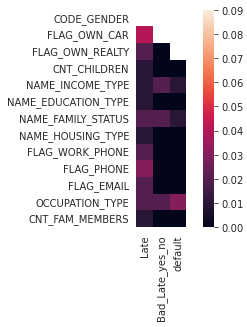

In [15]:
#Checking Cramers V for features and targets, note its vey weak - maybe need to narrow down data (exclude NaN, exlude Xs, maybe even exclude Cs)

features=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE','FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE','CNT_FAM_MEMBERS']
#FLAG_MOBILE was removed after NAME_HOUSING_TYPE
target=['Late','Bad_Late_yes_no','default']

rows= []

for var1 in features:
  col = []
  for var2 in target :
    cramers = cramers_v(app_and_credit2[var1],app_and_credit2[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = target, index = features)

import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(df, dtype=bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=0.09, square=True) #changed vmax to 0.09 as with 1 it shown little of output

plt.show()

0.012352906519678101
0.019648550227223168
0.0012601893716206833
0.03707348867851262
0.0
0.0
0.03301719494910391
0.0
0.0
0.0
0.0
0.0
0.010660737824928936
0.0247196652999957
0.019963063122720066
0.013241763863495298
0.0
0.0
0.019613348219214094
0.008742502021652818
0.0
0.01038608762685092
0.012862684728876281
0.0
0.013816879786278644
0.0
0.0
0.030462163227184067
0.0
0.0
0.02043145132148439
0.016494238110065715
0.010219585789602458
0.02465659366251618
0.04682741460504878
0.06807010257638564
0.0
0.0
0.0


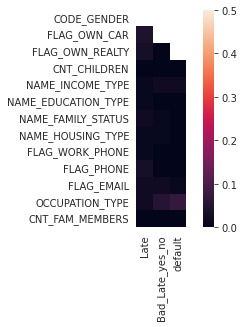

In [16]:
#Checking Cramers V for features and targets, note its vey weak - maybe need to narrow down data (exclude NaN, exlude Xs, maybe even exclude Cs)

features=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE','FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE','CNT_FAM_MEMBERS']
#FLAG_MOBILE was removed after NAME_HOUSING_TYPE
target=['Late','Bad_Late_yes_no','default']

#Trim datat to default only
app_and_credit2

# app_and_credit3=app_and_credit2[app_and_credit2['default']==True]
# app_and_credit3

# app_and_credit2[app_and_credit2['default']==True]


#Build an array of features to targets cramers v test and then turn into a dataframe to 
rows= []
for var1 in features:
  col = []
  for var2 in target :
    cramers = cramers_v(app_and_credit3[var1],app_and_credit3[var2]) # Cramer's V test
    print(cramers)
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = target, index = features)


#Piece of code to visualise featuers & target as heatmap
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(df, dtype=bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=0.5, square=True) #changed vmax to 0.09 as with 1 it shown little of output

plt.show()


,Late,Bad_Late_yes_no,default
CODE_GENDER,0.01,0.02,0.00
FLAG_OWN_CAR,0.04,0.00,0.00
FLAG_OWN_REALTY,0.03,0.00,0.00
CNT_CHILDREN,0.00,0.00,0.00
NAME_INCOME_TYPE,0.01,0.02,0.02
NAME_EDUCATION_TYPE,0.01,0.00,0.00
NAME_FAMILY_STATUS,0.02,0.01,0.00
NAME_HOUSING_TYPE,0.01,0.01,0.00
FLAG_WORK_PHONE,0.01,0.00,0.00
FLAG_PHONE,0.03,0.00,0.00


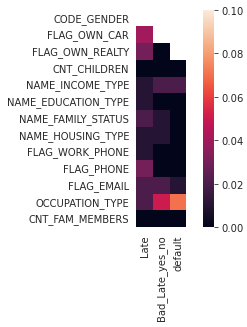

In [17]:
#Cramers V for features & targets on credit records with no NA & X. There is no correlation :(

features=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE','FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE','CNT_FAM_MEMBERS']
#FLAG_MOBILE was removed after NAME_HOUSING_TYPE
target=['Late','Bad_Late_yes_no','default']

#Build an array of features to targets cramers v test and then turn into a dataframe to 
rows= []
for var1 in features:
  col = []
  for var2 in target :
    cramers = cramers_v(app_and_credit3[var1],app_and_credit3[var2]) # Cramer's V test
    #print(cramers)
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = target, index = features)

display(df)


#Piece of code to visualise featuers & target as heatmap
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(df, dtype=bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=0.1, square=True) #changed vmax to 0.09 as with 1 it shown little of output

plt.show()



In [18]:
#Calcuate Spearman correlation between features & late ratio
from scipy.stats import spearmanr

app_and_credit_label_2=application_records_o.merge(credit_records_label_2,on='ID')
app_and_credit_label_2

features=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']
target='cr_late_ratio'

coef_list=[]
p_list=[]
i_list=[]

for el in features:
    coef, p = spearmanr(app_and_credit_label_2[el], app_and_credit_label_2[target])
    #print(el, 'Spearmans correlation coefficient: %.3f' % coef)
    # interpret the significance
    alpha = 0.05
    coef_list.append(coef)
    p_list.append(p)
    if p > alpha:
	    i_list.append('Not Correlated')
    else:
	    i_list.append('Correlated')

summary=pd.DataFrame(list(zip(features,coef_list,p_list,i_list)),columns=['Feature','Coef','p','interpret'])

summary
# # prepare data
# data1 = rand(1000) * 20
# data2 = data1 + (rand(1000) * 10)
# # calculate spearman's correlation
# coef, p = spearmanr(data1, data2)
# print('Spearmans correlation coefficient: %.3f' % coef)
# # interpret the significance
# alpha = 0.05
# if p > alpha:
# 	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
# else:
# 	print('Samples are correlated (reject H0) p=%.3f' % p)

C:\Users\User\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


,Feature,Coef,p,interpret
0,CODE_GENDER,-0.008053,1.241281e-01,Not Correlated
1,FLAG_OWN_CAR,-0.011310,3.081130e-02,Correlated
2,FLAG_OWN_REALTY,0.014225,6.603398e-03,Correlated
3,CNT_CHILDREN,-0.003821,4.656769e-01,Not Correlated
4,AMT_INCOME_TOTAL,-0.004691,3.704351e-01,Not Correlated
5,NAME_INCOME_TYPE,-0.001898,7.171155e-01,Not Correlated
6,NAME_EDUCATION_TYPE,0.034962,2.432813e-11,Correlated
7,NAME_FAMILY_STATUS,0.011132,3.353867e-02,Correlated
8,NAME_HOUSING_TYPE,0.003282,5.308549e-01,Not Correlated
9,DAYS_BIRTH,-0.011941,2.260785e-02,Correlated


In [19]:
#Explore proportions of features vs late_ratio bin (i.e. 1%0 late, 20% late etc.)

bins =[-np.inf,0,0.2,0.4,0.6,0.8,1] #bins don't include 0 therefore we need define bins including 0
app_and_credit_label_2['cr_late_bin']=pd.cut(app_and_credit_label_2['cr_late_ratio'],bins)
app_and_credit_label_2['cr_income_bin']=pd.qcut(app_and_credit_label_2['AMT_INCOME_TOTAL'],q=5) #do income bins based on count

app_and_credit_label_2



features=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'cr_income_bin', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']
features_excluded=['AMT_INCOME_TOTAL']
target='cr_late_ratio'

for el in features:
    display(pd.crosstab(app_and_credit_label_2[el],app_and_credit_label_2['cr_late_bin']))
    display(feature_target(app_and_credit_label_2,el,'cr_late_bin'))

cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
CODE_GENDER,,,,,,
F,2960,3934,4450,3476,2899,6711
M,1495,2073,2070,1722,1424,3243


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
CODE_GENDER,,,,,,
F,0.12,0.16,0.18,0.14,0.12,0.27
M,0.12,0.17,0.17,0.14,0.12,0.27


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
FLAG_OWN_CAR,,,,,,
N,2735,3572,4145,3300,2706,6156
Y,1720,2435,2375,1898,1617,3798


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
FLAG_OWN_CAR,,,,,,
N,0.12,0.16,0.18,0.15,0.12,0.27
Y,0.12,0.18,0.17,0.14,0.12,0.27


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
FLAG_OWN_REALTY,,,,,,
N,1475,1995,2204,1750,1389,3138
Y,2980,4012,4316,3448,2934,6816


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
FLAG_OWN_REALTY,,,,,,
N,0.12,0.17,0.18,0.15,0.12,0.26
Y,0.12,0.16,0.18,0.14,0.12,0.28


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
CNT_CHILDREN,,,,,,
0,3080,4099,4522,3609,2961,6930
1,950,1243,1314,1046,916,2023
2,365,569,597,473,390,862
3,42,80,76,55,48,118
4,13,11,7,9,6,17
5,5,5,4,3,2,1
7,0,0,0,2,0,0
14,0,0,0,1,0,2
19,0,0,0,0,0,1


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
CNT_CHILDREN,,,,,,
0,0.12,0.16,0.18,0.14,0.12,0.27
1,0.13,0.17,0.18,0.14,0.12,0.27
2,0.11,0.17,0.18,0.15,0.12,0.26
3,0.10,0.19,0.18,0.13,0.11,0.28
4,0.21,0.17,0.11,0.14,0.10,0.27
5,0.25,0.25,0.20,0.15,0.10,0.05
7,0.00,0.00,0.00,1.00,0.00,0.00
14,0.00,0.00,0.00,0.33,0.00,0.67
19,0.00,0.00,0.00,0.00,0.00,1.00


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
cr_income_bin,,,,,,
"(26999.999, 112500.0]",982,1398,1662,1213,995,2352
"(112500.0, 139500.0]",748,997,1046,871,756,1586
"(139500.0, 180000.0]",946,1299,1391,1146,951,2121
"(180000.0, 247500.0]",870,1228,1295,1091,838,2070
"(247500.0, 1575000.0]",909,1085,1126,877,783,1825


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
cr_income_bin,,,,,,
"(26999.999, 112500.0]",0.11,0.16,0.19,0.14,0.12,0.27
"(112500.0, 139500.0]",0.12,0.17,0.17,0.15,0.13,0.26
"(139500.0, 180000.0]",0.12,0.17,0.18,0.15,0.12,0.27
"(180000.0, 247500.0]",0.12,0.17,0.18,0.15,0.11,0.28
"(247500.0, 1575000.0]",0.14,0.16,0.17,0.13,0.12,0.28


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
NAME_INCOME_TYPE,,,,,,
Commercial associate,1096,1344,1525,1145,1048,2332
Pensioner,752,927,1115,911,744,1703
State servant,349,502,554,478,336,766
Student,0,6,2,2,1,0
Working,2258,3228,3324,2662,2194,5153


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
NAME_INCOME_TYPE,,,,,,
Commercial associate,0.13,0.16,0.18,0.13,0.12,0.27
Pensioner,0.12,0.15,0.18,0.15,0.12,0.28
State servant,0.12,0.17,0.19,0.16,0.11,0.26
Student,0.00,0.55,0.18,0.18,0.09,0.00
Working,0.12,0.17,0.18,0.14,0.12,0.27


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
NAME_EDUCATION_TYPE,,,,,,
Academic degree,4,10,6,5,3,4
Higher education,1265,1783,1792,1377,1095,2552
Incomplete higher,152,249,271,205,142,391
Lower secondary,38,85,82,39,46,84
Secondary / secondary special,2996,3880,4369,3572,3037,6923


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
NAME_EDUCATION_TYPE,,,,,,
Academic degree,0.12,0.31,0.19,0.16,0.09,0.12
Higher education,0.13,0.18,0.18,0.14,0.11,0.26
Incomplete higher,0.11,0.18,0.19,0.15,0.10,0.28
Lower secondary,0.10,0.23,0.22,0.10,0.12,0.22
Secondary / secondary special,0.12,0.16,0.18,0.14,0.12,0.28


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
NAME_FAMILY_STATUS,,,,,,
Civil marriage,380,483,534,394,385,769
Married,3061,4234,4433,3543,2930,6847
Separated,271,347,370,350,232,533
Single / not married,561,722,909,702,581,1354
Widow,182,221,274,209,195,451


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
NAME_FAMILY_STATUS,,,,,,
Civil marriage,0.13,0.16,0.18,0.13,0.13,0.26
Married,0.12,0.17,0.18,0.14,0.12,0.27
Separated,0.13,0.17,0.18,0.17,0.11,0.25
Single / not married,0.12,0.15,0.19,0.15,0.12,0.28
Widow,0.12,0.14,0.18,0.14,0.13,0.29


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
NAME_HOUSING_TYPE,,,,,,
Co-op apartment,30,29,34,30,14,31
House / apartment,3967,5357,5834,4623,3875,8892
Municipal apartment,145,173,202,180,125,303
Office apartment,34,42,46,35,23,82
Rented apartment,65,121,68,88,80,153
With parents,214,285,336,242,206,493


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
NAME_HOUSING_TYPE,,,,,,
Co-op apartment,0.18,0.17,0.20,0.18,0.08,0.18
House / apartment,0.12,0.16,0.18,0.14,0.12,0.27
Municipal apartment,0.13,0.15,0.18,0.16,0.11,0.27
Office apartment,0.13,0.16,0.18,0.13,0.09,0.31
Rented apartment,0.11,0.21,0.12,0.15,0.14,0.27
With parents,0.12,0.16,0.19,0.14,0.12,0.28


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
DAYS_BIRTH,,,,,,
-25152,0,2,0,0,0,0
-25140,3,0,0,0,0,0
-25099,0,0,0,0,1,0
-25088,1,0,0,0,0,0
-25010,0,0,0,0,0,2
...,...,...,...,...,...,...
-7959,0,0,0,0,0,2
-7757,1,1,2,0,0,0
-7723,0,0,0,0,0,2


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
DAYS_BIRTH,,,,,,
-25152,0.00,1.00,0.0,0.0,0.0,0.0
-25140,1.00,0.00,0.0,0.0,0.0,0.0
-25099,0.00,0.00,0.0,0.0,1.0,0.0
-25088,1.00,0.00,0.0,0.0,0.0,0.0
-25010,0.00,0.00,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
-7959,0.00,0.00,0.0,0.0,0.0,1.0
-7757,0.25,0.25,0.5,0.0,0.0,0.0
-7723,0.00,0.00,0.0,0.0,0.0,1.0


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
DAYS_EMPLOYED,,,,,,
-15713,0,0,0,0,0,1
-15661,0,0,2,0,2,0
-15227,0,0,0,0,0,2
-15072,1,0,0,0,1,1
-15038,6,6,1,2,0,1
...,...,...,...,...,...,...
-70,0,0,0,1,1,5
-66,1,0,0,0,0,0
-65,0,0,0,1,1,1


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
DAYS_EMPLOYED,,,,,,
-15713,0.00,0.00,0.00,0.00,0.00,1.00
-15661,0.00,0.00,0.50,0.00,0.50,0.00
-15227,0.00,0.00,0.00,0.00,0.00,1.00
-15072,0.33,0.00,0.00,0.00,0.33,0.33
-15038,0.38,0.38,0.06,0.12,0.00,0.06
...,...,...,...,...,...,...
-70,0.00,0.00,0.00,0.14,0.14,0.71
-66,1.00,0.00,0.00,0.00,0.00,0.00
-65,0.00,0.00,0.00,0.33,0.33,0.33


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
FLAG_MOBIL,,,,,,
1,4455,6007,6520,5198,4323,9954


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
FLAG_MOBIL,,,,,,
1,0.12,0.16,0.18,0.14,0.12,0.27


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
FLAG_WORK_PHONE,,,,,,
0,3434,4539,5060,4045,3317,7840
1,1021,1468,1460,1153,1006,2114


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
FLAG_WORK_PHONE,,,,,,
0,0.12,0.16,0.18,0.14,0.12,0.28
1,0.12,0.18,0.18,0.14,0.12,0.26


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
FLAG_PHONE,,,,,,
0,3111,4231,4647,3633,3104,6983
1,1344,1776,1873,1565,1219,2971


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
FLAG_PHONE,,,,,,
0,0.12,0.16,0.18,0.14,0.12,0.27
1,0.13,0.17,0.17,0.15,0.11,0.28


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
FLAG_EMAIL,,,,,,
0,4085,5440,5935,4728,3945,9053
1,370,567,585,470,378,901


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
FLAG_EMAIL,,,,,,
0,0.12,0.16,0.18,0.14,0.12,0.27
1,0.11,0.17,0.18,0.14,0.12,0.28


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
OCCUPATION_TYPE,,,,,,
Accountants,175,224,238,174,116,314
Cleaning staff,56,91,95,68,72,169
Cooking staff,80,97,102,95,66,215
Core staff,464,622,643,473,436,953
Drivers,259,380,384,297,241,577
HR staff,11,10,10,9,10,35
High skill tech staff,152,267,252,211,148,353
IT staff,8,10,10,7,6,19
Laborers,812,1053,1123,904,713,1606


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
OCCUPATION_TYPE,,,,,,
Accountants,0.14,0.18,0.19,0.14,0.09,0.25
Cleaning staff,0.10,0.17,0.17,0.12,0.13,0.31
Cooking staff,0.12,0.15,0.16,0.15,0.10,0.33
Core staff,0.13,0.17,0.18,0.13,0.12,0.27
Drivers,0.12,0.18,0.18,0.14,0.11,0.27
HR staff,0.13,0.12,0.12,0.11,0.12,0.41
High skill tech staff,0.11,0.19,0.18,0.15,0.11,0.26
IT staff,0.13,0.17,0.17,0.12,0.10,0.32
Laborers,0.13,0.17,0.18,0.15,0.11,0.26


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
CNT_FAM_MEMBERS,,,,,,
1.0,851,1040,1297,994,846,1959
2.0,2354,3279,3448,2858,2251,5273
3.0,856,1050,1122,825,803,1765
4.0,340,544,568,453,367,834
5.0,37,78,75,53,49,105
6.0,12,11,6,10,5,14
7.0,5,5,4,2,2,1
9.0,0,0,0,2,0,0
15.0,0,0,0,1,0,2


cr_late_bin,"(-inf, 0.0]","(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
CNT_FAM_MEMBERS,,,,,,
1.0,0.12,0.15,0.19,0.14,0.12,0.28
2.0,0.12,0.17,0.18,0.15,0.12,0.27
3.0,0.13,0.16,0.17,0.13,0.13,0.27
4.0,0.11,0.18,0.18,0.15,0.12,0.27
5.0,0.09,0.20,0.19,0.13,0.12,0.26
6.0,0.21,0.19,0.10,0.17,0.09,0.24
7.0,0.26,0.26,0.21,0.11,0.11,0.05
9.0,0.00,0.00,0.00,1.00,0.00,0.00
15.0,0.00,0.00,0.00,0.33,0.00,0.67


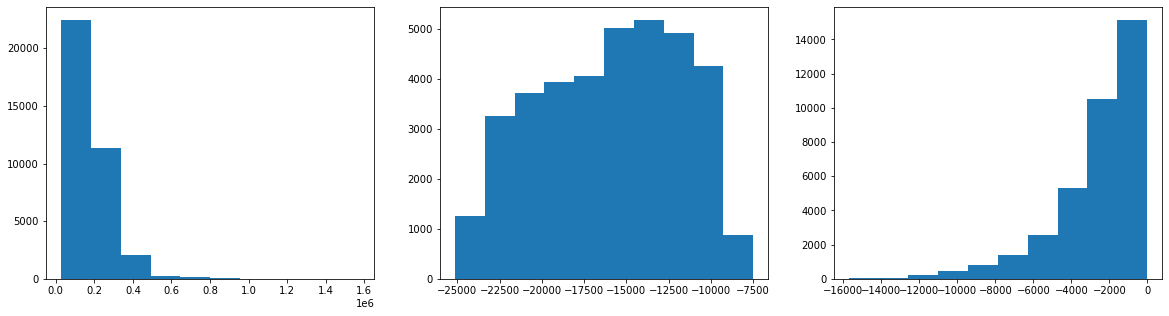

In [20]:
#Check if variables have normal distribution with histogram (it's clear they don't have normal distribution)

#Visual check (following https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)
import matplotlib.pyplot as plt
fig, axs=plt.subplots(1,3,figsize=(20,5))

axs[0].hist(app_and_credit_label_2['AMT_INCOME_TOTAL'])
axs[1].hist(app_and_credit_label_2['DAYS_BIRTH'])
axs[2].hist(app_and_credit_label_2['DAYS_EMPLOYED'])
plt.show()


In [21]:
#Explore data correlations 
import pandas as pd
import numpy as np
#Probability of default 
app_and_credit_label_2['default']=app_and_credit_label_2['val_count'].apply(lambda x: x['5'])
app_and_credit_label_2['default_f']=app_and_credit_label_2['val_count'].apply(lambda x: True if x['5']>0 else False)

pd.set_option('max_columns', None)

# app_and_credit_label_2[app_and_credit_label_2['default'].fillna('0')>0]

# # features_not_included= {'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED'}

features= {'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'}
target= ['default']

# # target_not_included={'cr_late_count','cr_late_ratio', 'cr_late_bin','cr_income_bin'}

# features=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'cr_income_bin', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']
# features_excluded=['AMT_INCOME_TOTAL']
# # target='cr_late_ratio'

pd.options.display.float_format = '{:.3f}'.format

for var5 in features:
    display(pd.crosstab(app_and_credit_label_2[var5],app_and_credit_label_2['default_f']))
    display(pd.crosstab(app_and_credit_label_2[var5],app_and_credit_label_2['default_f'],normalize='index'))


# app_and_credit_label_3 = app_and_credit_label_2.dropna(subset=['default'],inplace=True)

# pd.crosstab(app_and_credit_label_2['CODE_GENDER'],app_and_credit_label_2['default'])
# # app_and_credit_label_2.dropna(subset=['default'])

# # app_and_credit_label_2[app_and_credit_label_2[target]==48]



default_f,False,True
FLAG_MOBIL,,
1,36277,180


default_f,False,True
FLAG_MOBIL,,
1,0.995,0.005


default_f,False,True
FLAG_OWN_CAR,,
N,22494,120
Y,13783,60


default_f,False,True
FLAG_OWN_CAR,,
N,0.995,0.005
Y,0.996,0.004


default_f,False,True
NAME_EDUCATION_TYPE,,
Academic degree,32,0
Higher education,9807,57
Incomplete higher,1403,7
Lower secondary,368,6
Secondary / secondary special,24667,110


default_f,False,True
NAME_EDUCATION_TYPE,,
Academic degree,1.000,0.000
Higher education,0.994,0.006
Incomplete higher,0.995,0.005
Lower secondary,0.984,0.016
Secondary / secondary special,0.996,0.004


default_f,False,True
FLAG_WORK_PHONE,,
0,28093,142
1,8184,38


default_f,False,True
FLAG_WORK_PHONE,,
0,0.995,0.005
1,0.995,0.005


default_f,False,True
NAME_FAMILY_STATUS,,
Civil marriage,2939,6
Married,24923,125
Separated,2090,13
Single / not married,4800,29
Widow,1525,7


default_f,False,True
NAME_FAMILY_STATUS,,
Civil marriage,0.998,0.002
Married,0.995,0.005
Separated,0.994,0.006
Single / not married,0.994,0.006
Widow,0.995,0.005


default_f,False,True
OCCUPATION_TYPE,,
Accountants,1238,3
Cleaning staff,549,2
Cooking staff,650,5
Core staff,3565,26
Drivers,2131,7
HR staff,85,0
High skill tech staff,1373,10
IT staff,58,2
Laborers,6183,28


default_f,False,True
OCCUPATION_TYPE,,
Accountants,0.998,0.002
Cleaning staff,0.996,0.004
Cooking staff,0.992,0.008
Core staff,0.993,0.007
Drivers,0.997,0.003
HR staff,1.000,0.000
High skill tech staff,0.993,0.007
IT staff,0.967,0.033
Laborers,0.995,0.005


default_f,False,True
CNT_FAM_MEMBERS,,
1.000,6951,36
2.000,19365,98
3.000,6387,34
4.000,3096,10
5.000,396,1
6.000,57,1
7.000,19,0
9.000,2,0
15.000,3,0


default_f,False,True
CNT_FAM_MEMBERS,,
1.000,0.995,0.005
2.000,0.995,0.005
3.000,0.995,0.005
4.000,0.997,0.003
5.000,0.997,0.003
6.000,0.983,0.017
7.000,1.000,0.000
9.000,1.000,0.000
15.000,1.000,0.000


default_f,False,True
NAME_INCOME_TYPE,,
Commercial associate,8441,49
Pensioner,6114,38
State servant,2974,11
Student,11,0
Working,18737,82


default_f,False,True
NAME_INCOME_TYPE,,
Commercial associate,0.994,0.006
Pensioner,0.994,0.006
State servant,0.996,0.004
Student,1.000,0.000
Working,0.996,0.004


default_f,False,True
FLAG_EMAIL,,
0,33024,162
1,3253,18


default_f,False,True
FLAG_EMAIL,,
0,0.995,0.005
1,0.994,0.006


default_f,False,True
FLAG_PHONE,,
0,25587,122
1,10690,58


default_f,False,True
FLAG_PHONE,,
0,0.995,0.005
1,0.995,0.005


default_f,False,True
FLAG_OWN_REALTY,,
N,11885,66
Y,24392,114


default_f,False,True
FLAG_OWN_REALTY,,
N,0.994,0.006
Y,0.995,0.005


default_f,False,True
CODE_GENDER,,
F,24319,111
M,11958,69


default_f,False,True
CODE_GENDER,,
F,0.995,0.005
M,0.994,0.006


default_f,False,True
NAME_HOUSING_TYPE,,
Co-op apartment,166,2
House / apartment,32393,155
Municipal apartment,1116,12
Office apartment,260,2
Rented apartment,571,4
With parents,1771,5


default_f,False,True
NAME_HOUSING_TYPE,,
Co-op apartment,0.988,0.012
House / apartment,0.995,0.005
Municipal apartment,0.989,0.011
Office apartment,0.992,0.008
Rented apartment,0.993,0.007
With parents,0.997,0.003


default_f,False,True
CNT_CHILDREN,,
0,25075,126
1,7450,42
2,3246,10
3,418,1
4,62,1
5,20,0
7,2,0
14,3,0
19,1,0


default_f,False,True
CNT_CHILDREN,,
0,0.995,0.005
1,0.994,0.006
2,0.997,0.003
3,0.998,0.002
4,0.984,0.016
5,1.000,0.000
7,1.000,0.000
14,1.000,0.000
19,1.000,0.000


array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>],
       [<AxesSubplot:title={'center':'DAYS_EMPLOYED'}>,
        <AxesSubplot:title={'center':'FLAG_MOBIL'}>,
        <AxesSubplot:title={'center':'FLAG_WORK_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_PHONE'}>],
       [<AxesSubplot:title={'center':'FLAG_EMAIL'}>,
        <AxesSubplot:title={'center':'CNT_FAM_MEMBERS'}>,
        <AxesSubplot:title={'center':'start_mth'}>,
        <AxesSubplot:title={'center':'end_mth'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'cr_late_count'}>,
        <AxesSubplot:title={'center':'cr_late_ratio'}>,
        <AxesSubplot:title={'center':'default'}>]], dtype=object)

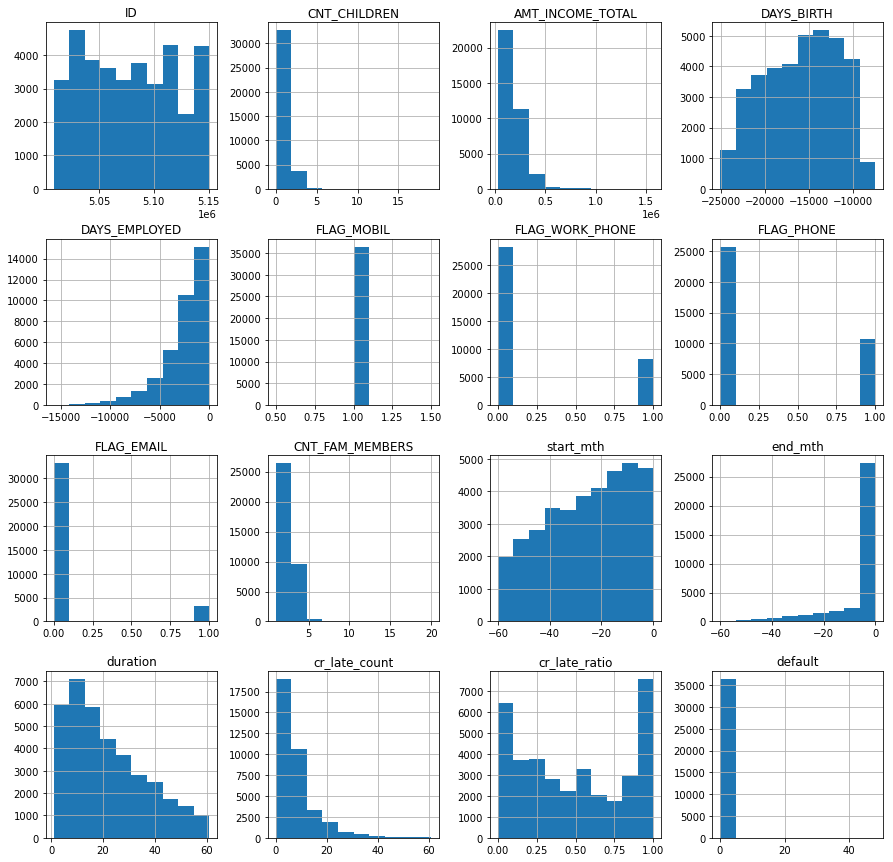

In [22]:
app_and_credit_label_2.hist(figsize=(15,15))

In [23]:
app_and_credit_label_2.iloc[:,18:][app_and_credit_label_2['default']>0]

,0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12,-13,-14,-15,-16,-17,-18,-19,-20,-21,-22,-23,-24,-25,-26,-27,-28,-29,-30,-31,-32,-33,-34,-35,-36,-37,-38,-39,-40,-41,-42,-43,-44,-45,-46,-47,-48,-49,-50,-51,-52,-53,-54,-55,-56,-57,-58,-59,-60,val_count,start_mth,end_mth,duration,cr_late_count,cr_late_ratio,cr_late_bin,cr_income_bin,default,default_f
652,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,5,5,5,5,4,3,2,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"{'C': 32, '5': 4, '4': 1, '3': 1, '2': 1, '1':...",-59,0,60,28,0.467,"(0.4, 0.6]","(180000.0, 247500.0]",4,True
748,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,5,5,5,5,5,5,5,5,5,5,5,4,3,2,5,5,4,3,2,2,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,"{'C': 31, '5': 13, '4': 2, '3': 2, '2': 3, '1'...",-55,0,56,25,0.446,"(0.4, 0.6]","(247500.0, 1575000.0]",13,True
1652,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,5,5,5,4,3,2,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'C': 35, '5': 3, '4': 1, '3': 1, '2': 1, '1':...",-51,0,52,17,0.327,"(0.2, 0.4]","(247500.0, 1575000.0]",3,True
1858,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,5,5,5,5,5,5,5,5,5,5,5,4,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,"{'C': 28, '5': 11, '4': 1, '3': 1, '2': 1, '1'...",-54,0,55,27,0.491,"(0.4, 0.6]","(26999.999, 112500.0]",11,True
1860,C,C,C,C,C,C,C,C,5,5,5,5,5,5,5,5,5,5,5,4,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'C': 8, '5': 11, '4': 1, '3': 1, '2': 1, '1':...",-34,0,35,27,0.771,"(0.6, 0.8]","(26999.999, 112500.0]",11,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36442,C,C,C,C,C,5,5,5,5,5,5,5,4,3,2,1,0,0,0,0,0,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'C': 5, '5': 7, '4': 1, '3': 1, '2': 1, '1': ...",-21,0,22,16,0.727,"(0.6, 0.8]","(26999.999, 112500.0]",7,True
36449,5,5,5,5,5,5,5,5,5,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'5': 10, '0': 2, nan: 49}",-11,0,12,12,1.000,"(0.8, 1.0]","(247500.0, 1575000.0]",10,True
36452,5,5,5,X,X,4,X,X,X,X,X,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'5': 3, 'X': 8, '4': 1, nan: 49}",-11,0,12,4,0.333,"(0.2, 0.4]","(247500.0, 1575000.0]",3,True
36453,C,C,C,C,C,5,5,5,5,5,5,5,4,3,2,2,1,1,1,1,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'C': 5, '5': 7, '4': 1, '3': 1, '2': 2, '1': ...",-23,0,24,19,0.792,"(0.6, 0.8]","(139500.0, 180000.0]",7,True


In [24]:
app_and_credit_label_2[app_and_credit_label_2['default']>0].groupby(by='default').size().value_counts(ascending=False)

1     10
9      4
2      3
6      2
5      2
3      2
30     1
17     1
15     1
14     1
16     1
8      1
dtype: int64

In [25]:
len(app_and_credit_label_2)

36457

In [26]:
app_and_credit_label_2.columns

Index([                 'ID',         'CODE_GENDER',        'FLAG_OWN_CAR',
           'FLAG_OWN_REALTY',        'CNT_CHILDREN',    'AMT_INCOME_TOTAL',
          'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',  'NAME_FAMILY_STATUS',
         'NAME_HOUSING_TYPE',          'DAYS_BIRTH',       'DAYS_EMPLOYED',
                'FLAG_MOBIL',     'FLAG_WORK_PHONE',          'FLAG_PHONE',
                'FLAG_EMAIL',     'OCCUPATION_TYPE',     'CNT_FAM_MEMBERS',
                           0,                    -1,                    -2,
                          -3,                    -4,                    -5,
                          -6,                    -7,                    -8,
                          -9,                   -10,                   -11,
                         -12,                   -13,                   -14,
                         -15,                   -16,                   -17,
                         -18,                   -19,                   -20,
            

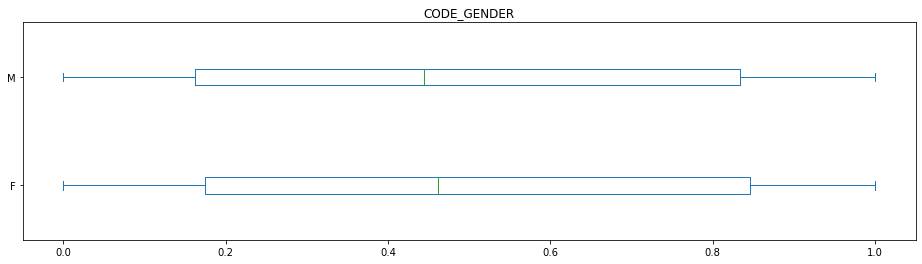

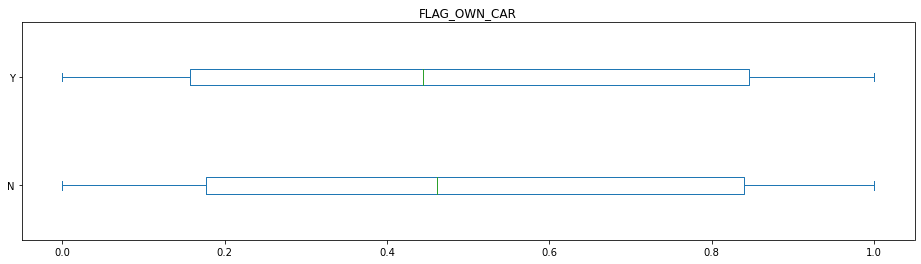

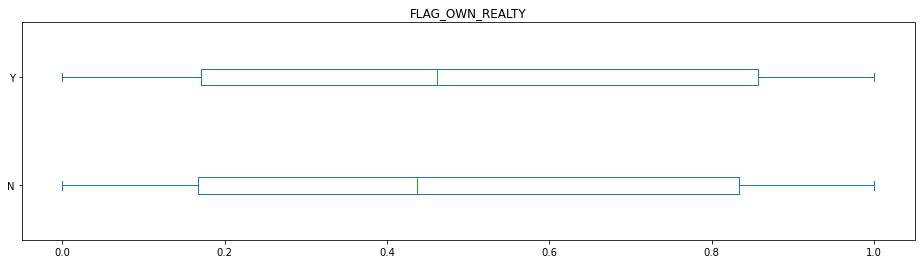

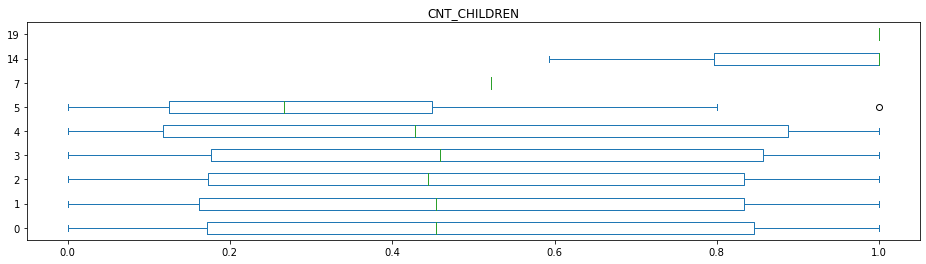

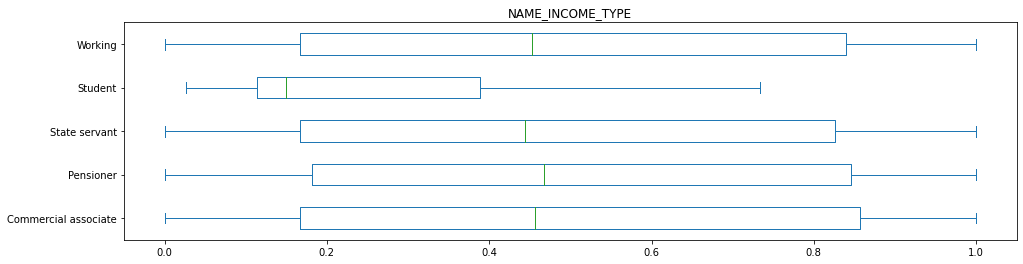

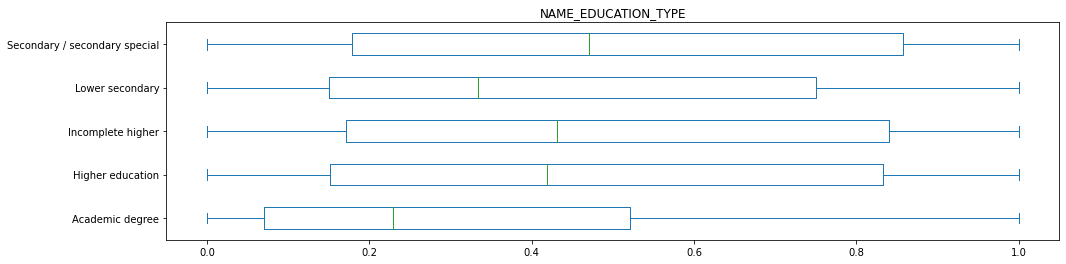

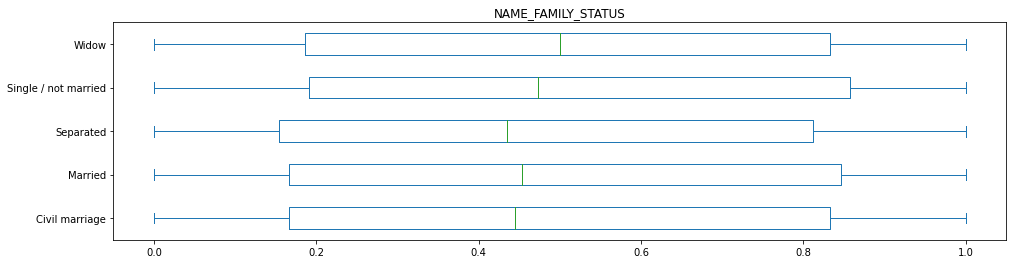

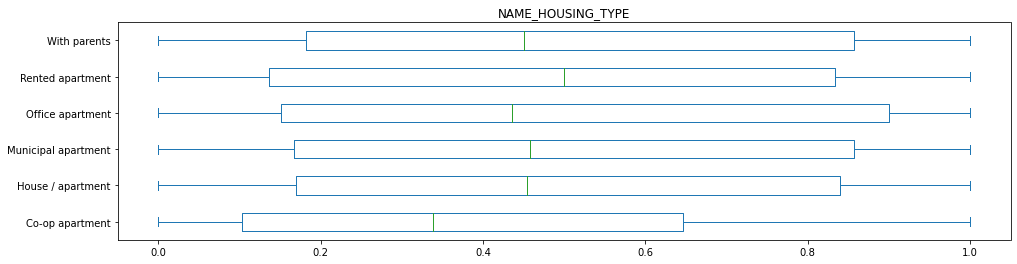

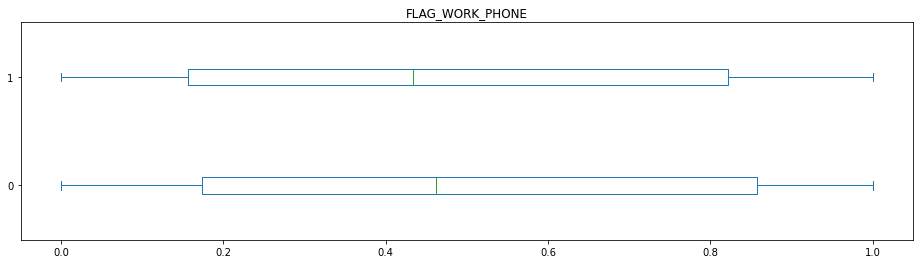

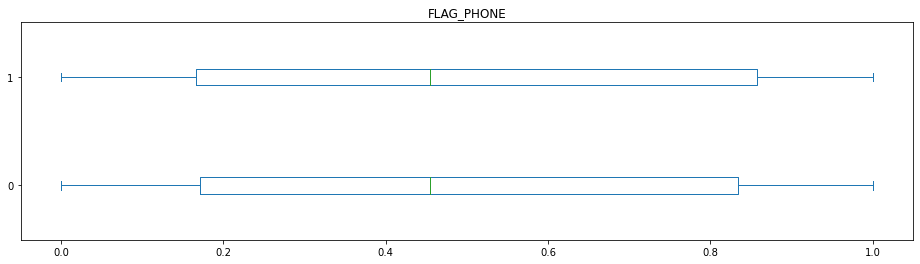

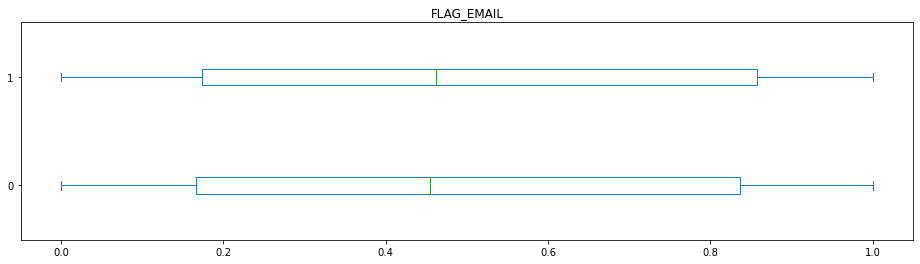

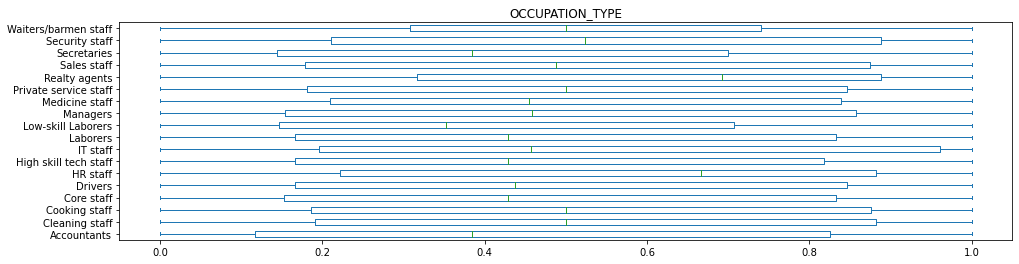

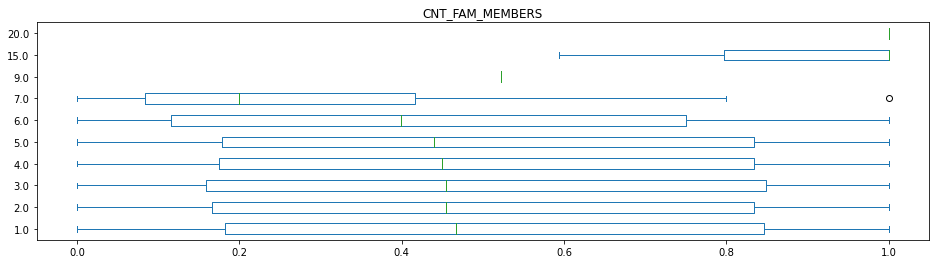

In [27]:
#Plotting multiple whiskers for one variable

columns= ['ID',         'CODE_GENDER',        'FLAG_OWN_CAR',
           'FLAG_OWN_REALTY',        'CNT_CHILDREN',    'AMT_INCOME_TOTAL',
          'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',  'NAME_FAMILY_STATUS',
         'NAME_HOUSING_TYPE',          'DAYS_BIRTH',       'DAYS_EMPLOYED',
                'FLAG_MOBIL',     'FLAG_WORK_PHONE',          'FLAG_PHONE',
                'FLAG_EMAIL',     'OCCUPATION_TYPE',     'CNT_FAM_MEMBERS',
                'val_count',           'start_mth',
                   'end_mth',            'duration',       'cr_late_count',
             'cr_late_ratio',         'cr_late_bin',       'cr_income_bin',
                   'default',           'default_f']
                
# app_and_credit_label_2[app_and_credit_label_2['CODE_GENDER']=='M']['cr_late_ratio']

# # app_and_credit_label_2.columns
# fig , ax = plt.subplots()

# ax.hist(app_and_credit_label_2[app_and_credit_label_2['CODE_GENDER']=='M']['default'],alpha=0.2,label='M',density=True)
# ax.hist(app_and_credit_label_2[app_and_credit_label_2['CODE_GENDER']=='F']['default'],alpha=0.2,label="F",density=True)
# ax.legend()
# plt.show()
features=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL', 'OCCUPATION_TYPE','CNT_FAM_MEMBERS']
features_excl=['AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED']

for el in features:
    app_and_credit_label_2[[el,'cr_late_ratio','ID']].pivot_table(index='ID',columns=el, values='cr_late_ratio').plot(kind='box',figsize=[16,4],title=el,vert=False)


# x = app_and_credit_label_2[['CODE_GENDER','cr_late_ratio','ID']].pivot_table(index='ID',columns='CODE_GENDER', values='cr_late_ratio')
# x.plot(kind='box', figsize=[16,8])



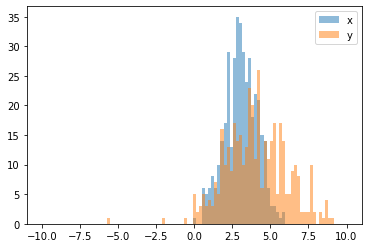

In [28]:
#Plotting multiple graphs on one chart example
import random
import numpy
from matplotlib import pyplot

x = [random.gauss(3,1) for _ in range(400)]
y = [random.gauss(4,2) for _ in range(400)]

bins = numpy.linspace(-10, 10, 100)

pyplot.hist(x, bins, alpha=0.5, label='x')
pyplot.hist(y, bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

In [29]:
#This function will trim the to selection made by user

features=['ID', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN','income_bin', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',  'NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE','CNT_FAM_MEMBERS']

def_code_gender=app_and_credit_label_2['CODE_GENDER'].unique()
features_excluded=['val_count', 'start_mth', 'end_mth', 'duration', 'cr_late_count', 'cr_late_ratio', 'cr_late_bin', 'cr_income_bin', 'default','default_f']

def set_filter(dic: dict):
    """ This function constructs a dictionary representation of user selection.
    i.e if user selected: 'CODE_GENDER': 'M','FLAG_OWN_CAR': 'Y','CNT_CHILDREN': 1, the output will be:
    {'ID': None, 'CODE_GENDER': 'M', 'FLAG_OWN_CAR': 'Y', 'FLAG_OWN_REALTY': None, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': None, 'NAME_INCOME_TYPE': None, 'NAME_EDUCATION_TYPE': None, 'NAME_FAMILY_STATUS': None, 'NAME_HOUSING_TYPE': None, 'DAYS_BIRTH': None, 'DAYS_EMPLOYED': None, 'FLAG_MOBIL': None, 'FLAG_WORK_PHONE': None, 'FLAG_PHONE': None, 'FLAG_EMAIL': None, 'OCCUPATION_TYPE': None, 'CNT_FAM_MEMBERS': None}
    """
    #construct curr_filter dictionary with None values for all features
    features=['ID', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN','income_bin', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',  'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE','CNT_FAM_MEMBERS']
    values=[None]*len(features)
    curr_filter=dict(zip(features,values))
    #read what was provided in dic and set those keys only to sth
    for key, val in dic.items():
        #print(key,val)
        curr_filter[key]=val
    return curr_filter

def gen_condition_str(filter: dict):
    """ This function takes a list of keys & values and makes a qeury out of them.
    I.e. {'ID': None, 'CODE_GENDER': 'M', 'FLAG_OWN_CAR': 'Y', 'FLAG_OWN_REALTY': None, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': None, 'NAME_INCOME_TYPE': None, 'NAME_EDUCATION_TYPE': None, 'NAME_FAMILY_STATUS': None, 'NAME_HOUSING_TYPE': None, 'DAYS_BIRTH': None, 'DAYS_EMPLOYED': None, 'FLAG_MOBIL': None, 'FLAG_WORK_PHONE': None, 'FLAG_PHONE': None, 'FLAG_EMAIL': None, 'OCCUPATION_TYPE': None, 'CNT_FAM_MEMBERS': None}
    will return: CODE_GENDER == 'M' & FLAG_OWN_CAR == 'Y' & CNT_CHILDREN == 1 which can be used in df.query
    """
    query=" & ".join(f"{key} == {repr(val)}" for key,val in filter.items() if val!=None and key!='income_bin') #dynamic column & values filtering where columns can take string values - must use the repr function https://www.semicolonworld.com/question/59812/dynamically-filtering-a-pandas-dataframe
    if filter['income_bin']==None:
        return query
    else:
        if len(query)==0:
            query="income_bin.astype('str') == '{}'".format(filter['income_bin'])
            return query
        else:
            query=query + " & income_bin.astype('str') == '{}'".format(filter['income_bin'])
            return query

In [30]:
test_dict={'CODE_GENDER': 'M','FLAG_OWN_CAR': 'Y','CNT_CHILDREN': 1,'income_bin': 2}
print(set_filter(test_dict))

print(gen_condition_str(set_filter(test_dict)))


{'ID': None, 'CODE_GENDER': 'M', 'FLAG_OWN_CAR': 'Y', 'FLAG_OWN_REALTY': None, 'CNT_CHILDREN': 1, 'income_bin': 2, 'NAME_INCOME_TYPE': None, 'NAME_EDUCATION_TYPE': None, 'NAME_FAMILY_STATUS': None, 'NAME_HOUSING_TYPE': None, 'DAYS_BIRTH': None, 'DAYS_EMPLOYED': None, 'FLAG_MOBIL': None, 'FLAG_WORK_PHONE': None, 'FLAG_PHONE': None, 'FLAG_EMAIL': None, 'OCCUPATION_TYPE': None, 'CNT_FAM_MEMBERS': None}
CODE_GENDER == 'M' & FLAG_OWN_CAR == 'Y' & CNT_CHILDREN == 1 & income_bin.astype('str') == '2'


In [64]:
#Application GUI

#Define widgets to get user input
import ipywidgets as widgets
sex = widgets.Dropdown(options=['M','F',None],value=None, description='Sex')
car = widgets.Dropdown(options=['N','Y',None], value=None, description='Own Car')
realty = widgets.Dropdown(options=['N','Y',None], value=None, description='Own Realty')
# children = widgets.IntSlider(min=0,max=20,step=1, value=None, description='Childrens Number')
children = widgets.Dropdown(options=[*range(11),None],value=None,description="Childrens Number")
# income_amt=widgets.widgets.BoundedIntText(min=0, max= 100000000, step=25000, value=None, description='Yearly Income')
# income_amt=widgets.Dropdown(options=[*range(0,2025000,25000),None],value=None, description='Yearly Income')
t=app_and_credit_label_2['income_bin'].sort_values().unique()
income_amt=widgets.Dropdown(options=[*t,None],value=None, description='Yearly Income')
income_type =widgets.Dropdown(options=['State servant', 'Student', 'Commercial associate', 'Pensioner', 'Working',None],value=None, description='Income_type')# b = widgets.IntSlider(description='b')
education_type = widgets.Dropdown(options=['Incomplete higher', 'Academic degree', 'Higher education', 'Secondary / secondary special', 'Lower secondary',None],value=None, description='Education')
family_status = widgets.Dropdown(options=['Widow', 'Married', 'Single / not married', 'Civil marriage', 'Separated',None],value=None,description='Family Status')
housting_type= widgets.Dropdown(options=['Municipal apartment', 'Office apartment','House / apartment','With parents','Co-op apartment','Rented apartment',None],value=None, description="Housing Type")
# birth_date = widgets.DatePicker(value=None, description="Birth Date")
birth_date = widgets.Dropdown(options=[*range(18,100,1),None], value=None, description="Birth Date")
# employment_date = widgets.DatePicker(value=None, description="Employment Date")
employment_date = widgets.Dropdown(options=[*range(0,50,1),None], value=None, description="Employment Date")
occupation_type = widgets.Dropdown(options=['High skill tech staff','Private service staff','Managers','Sales staff','Secretaries','IT staff','Realty agents','HR staff','Low-skill Laborers','Accountants',
 'Waiters/barmen staff', 'Core staff', 'Cleaning staff', 'Medicine staff', 'Drivers', 'Laborers','Cooking staff','Security staff',None],value=None,description="Occupation")
submit_button=widgets.Button(description='Submit')

#Below is just a list of dataframe columns and ones that were added to widgets and those that weren't
Columns_Full=['ID', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN','income_bin', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',  'NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE', 'age', 'length_of_empl', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE','CNT_FAM_MEMBERS']
Columns_Ommitted=['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL','CNT_FAM_MEMBERS','AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED']

#capture all values of widgets
def read_values():
    """Captures values of all widgets and returns them as dictionary e.g. {'CODE_GENDER':'M, 'FLAG_OWN_CAR':'Y'...}"""
    dic_keys=['CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN','income_bin','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',  'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE', 'age', 'length_of_empl', 'OCCUPATION_TYPE']
    dic_values=[sex.value, car.value ,realty.value ,children.value,income_amt.value,income_type.value,education_type.value,family_status.value,housting_type.value,
    -1*birth_date.value if birth_date.value!=None else None, -1*employment_date.value if employment_date.value!=None else None, occupation_type.value]
    return dict(zip(dic_keys,dic_values))

#Print values of widgest on change of any of them
def print_values(a,b,c,d,e,f,g,h,i,j,k,l):
    """Print current values of widgets"""
    print(print(read_values()))
values_of_widgets = widgets.interactive_output(print_values,{'a':sex,'b': car, 'c':realty, 'd':children, 'e':income_amt,'f':income_type,'g':education_type,'h':family_status,'i':housting_type, 
        'j':birth_date,'k': employment_date,'l':occupation_type})

#Print condition generated on back of dictionary of widgets values
def print_condition(a,b,c,d,e,f,g,h,i,j,k,l):
    """Print condition based on values of widgets"""
    print(print(gen_condition_str(read_values())))
condition_generated = widgets.interactive_output(print_condition,{'a':sex,'b': car, 'c':realty, 'd':children, 'e':income_amt,'f':income_type,'g':education_type,'h':family_status,'i':housting_type, 
        'j':birth_date,'k': employment_date,'l':occupation_type})

###########################################HISTOGRAM PLOTS
#Plots a unfiltered chart on all values
def plot_unfiltered():
    data=app_and_credit_label_2['cr_late_ratio']
    mean_v=app_and_credit_label_2['cr_late_ratio'].mean()
    plt.hist(app_and_credit_label_2['cr_late_ratio'],density=True,label="Late ratio. Records {}. Mean late {:.2f}".format(len(data),mean_v))
    plt.legend()
    plt.show()
chart_unfiltered = widgets.interactive_output(plot_unfiltered, {})

#Plots a chart filtered down to user selection via widgets and also prints in legend number of records meeting selection criteria
def plot_filtered(a,b,c,d,e,f,g,h,i,j,k,l):
    """Plots cr_late_ratio with data filtered to the one selected on widgets"""
    if len(gen_condition_str(read_values()))!=0: #check if there is any condition if not it will plot all records
        data=app_and_credit_label_2.query(gen_condition_str(read_values()),engine='python')['cr_late_ratio']
        if len(data)!=0: #checks if there is any data in the intersection of user seleciton if not will print msg saying theres none
            mean_v=data.mean()
            plt.hist(data,density=True,label="Late ratio. Records: {}, Mean {:.2f}".format(len(data),mean_v))
            plt.legend()
            plt.show()
        else:
            print('There are no records in this selection')
    else:
        plt.hist(app_and_credit_label_2['cr_late_ratio'],density=True,label="Late ratio on filtered records ({})".format(len(app_and_credit_label_2)),bins=10)
        plt.legend()
        plt.show()

chart_filtered = widgets.interactive_output(plot_filtered,{'a':sex,'b': car, 'c':realty, 'd':children, 'e':income_amt,'f':income_type,'g':education_type,'h':family_status,'i':housting_type, 
        'j':birth_date,'k': employment_date,'l':occupation_type})

###########################################Box Plots
#Plots a unfiltered chart on all values
def plot_unfiltered_box():
    plt.boxplot(app_and_credit_label_2['cr_late_ratio'])
    plt.show()
chart_unfiltered_box = widgets.interactive_output(plot_unfiltered_box, {})

#Plots a chart filtered down to user selection via widgets and also prints in legend number of records meeting selection criteria
def plot_filtered_box(a,b,c,d,e,f,g,h,i,j,k,l):
    """Plots cr_late_ratio with data filtered to the one selected on widgets"""
    if len(gen_condition_str(read_values()))!=0:
        data=app_and_credit_label_2.query(gen_condition_str(read_values()))['cr_late_ratio']
        plt.boxplot(data)
        plt.show()
    else:
        plt.boxplot(app_and_credit_label_2['cr_late_ratio'])
        plt.show()

chart_filtered_box = widgets.interactive_output(plot_filtered_box,{'a':sex,'b': car, 'c':realty, 'd':children, 'e':income_amt,'f':income_type,'g':education_type,'h':family_status,'i':housting_type, 
        'j':birth_date,'k': employment_date,'l':occupation_type})


# #Shows table of records unfiltered by user selection
# def table_unfiltered():
#     display(app_and_credit_label_2['cr_late_ratio'].mean())
# table_unfiltered_widget=widgets.interactive_output(table_unfiltered,{})

# #Shows table of records filtered  user selection
# def table_filtered(a,b,c,d,e,f,g,h,i,j,k,l):
#     if len(gen_condition_str(read_values()))!=0:
#         display(len(app_and_credit_label_2.query(gen_condition_str(read_values()))))
#     else:
#         display(len(app_and_credit_label_2))
# table_filtered_widget=widgets.interactive_output(table_filtered,{'a':sex,'b': car, 'c':realty, 'd':children, 'e':income_amt,'f':income_type,'g':education_type,'h':family_status,'i':housting_type, 
#         'j':birth_date,'k': employment_date,'l':occupation_type})

#Construct layout of on vertical box contatining a number of horizontal boxes that contain widgets
input_widgets=widgets.VBox([
    widgets.HBox([sex, realty, car]),
    widgets.HBox([children,income_type,education_type]),
    widgets.HBox([family_status, housting_type,occupation_type]),
    widgets.HBox([birth_date,employment_date,income_amt]),
    widgets.HBox([values_of_widgets]),
    widgets.HBox([condition_generated])
    ])

chart_widgets_hist=widgets.HBox([chart_unfiltered,chart_filtered])
chart_widgets_box=widgets.HBox([chart_unfiltered_box,chart_filtered_box])

# table_widgets=widgets.HBox([table_unfiltered_widget,table_filtered_widget])
# final_layout=widgets.VBox([input_widgets,chart_widgets,table_widgets])
final_layout=widgets.VBox([input_widgets,chart_widgets_hist,chart_widgets_box])
# widgets.VBox([left_thing,widgets.HBox([chart_unfiltered,chart_filtered])])



In [65]:
final_layout

In [ ]:
# alt1=widgets.VBox([sex,children,family_status,birth_date,chart_unfiltered,chart_unfiltered_box]),
# alt2=widgets.VBox([realty,income_type,housting_type,employment_date,chart_filtered,chart_filtered_box]),
# alt3=widgets.VBox([car,education_type,occupation_type,income_amt])

# alt_view=widgets.HBox([alt3])

alt1=widgets.VBox([sex,children,family_status,birth_date]),
alt2=widgets.VBox([realty,income_type,housting_type,employment_date]),
alt3=widgets.VBox([car,education_type,occupation_type,income_amt])

alt_view=widgets.HBox([alt3])

In [59]:
# app_and_credit_label_2['AMT_INCOME_TOTAL'].hist(bins=100)
app_and_credit_label_2['income_bin']=pd.cut(app_and_credit_label_2['AMT_INCOME_TOTAL'],bins=20)
app_and_credit_label_2['age']=round((app_and_credit_label_2['DAYS_BIRTH']/365),0)
app_and_credit_label_2['length_of_empl']=round((app_and_credit_label_2['DAYS_EMPLOYED']/365),0)

app_and_credit_label_2['income_bin'].sort_values().unique()

[(25452.0, 104400.0], (104400.0, 181800.0], (181800.0, 259200.0], (259200.0, 336600.0], (336600.0, 414000.0], ..., (878400.0, 955800.0], (955800.0, 1033200.0], (1110600.0, 1188000.0], (1342800.0, 1420200.0], (1497600.0, 1575000.0]]
Length: 16
Categories (20, interval[float64, right]): [(25452.0, 104400.0] < (104400.0, 181800.0] < (181800.0, 259200.0] < (259200.0, 336600.0] ... (1265400.0, 1342800.0] < (1342800.0, 1420200.0] < (1420200.0, 1497600.0] < (1497600.0, 1575000.0]]

In [58]:
round((app_and_credit_label_2['DAYS_EMPLOYED']/365),0).sort_values(ascending=False).unique()

array([ -0.,  -1.,  -2.,  -3.,  -4.,  -5.,  -6.,  -7.,  -8.,  -9., -10.,
       -11., -12., -13., -14., -15., -16., -17., -18., -19., -20., -21.,
       -22., -23., -24., -25., -26., -27., -28., -29., -30., -31., -32.,
       -33., -34., -35., -36., -37., -38., -39., -40., -41., -42., -43.])